# Analyse Exploratoire des données de la banque mondiale
   L'objectif de ce travail est d'obtenir les données, de les nettoyer et faire une recommandation commerciale pour le projet 
   d'expansion à l'internationale de la start-up "academy" qui propose des contenus de formation en ligne pour un public de  
   niveau lycée et université. 

# Importantion des packages Python

In [1]:
import numpy as np # Algebre linéaire
import pandas as pd 
import seaborn as sns # graphiques
import matplotlib.pyplot as plt # graphiques
import scipy.stats as st # Calcul de correlation
import numpy as np # numerical data
from pandas import Series,DataFrame 
import plotly.express as px

In [2]:
!pip install plotly

# Chargement des données à partir des fichiers .csv 

In [3]:
pd.set_option('display.max_columns', 100)
ed_stats_data=pd.read_csv('EdStatsData.csv', sep= ',')
ed_stats_country_series = pd.read_csv('EdStatsCountry-Series.csv', sep= ',')
ed_stats_country = pd.read_csv('EdStatsCountry.csv', sep= ',')
ed_stats_footnote = pd.read_csv('EdStatsFootNote.csv', sep= ',')
ed_stats_series = pd.read_csv('EdStatsSeries.csv', sep= ',')

# Besoin Métier :

# --------------  Définition des Fonctions dont on a besoin ---------------------

In [4]:
# 1- Servira à la récupération du nom de la DataFrame :
def namestr(obj, namespace):
    return [name for name in namespace if namespace[name] is obj]

# 2- Calcul du nombre de lignes : 
def nb_lignes(data):
    nb_lignes = len(data)
    return nb_lignes

# 3- Calcul du nombre de colones : 
def nb_colonnes(data):
    nb_colonnes = len(data.columns)
    return nb_colonnes
    
# 4- Calcul du nombre de cellules vides : 
def nb_cell_vides(data):
    nb_cell_vides = data.isna().sum().sum()
    return nb_cell_vides

# 5- % de cellules vides par colonne : 
def pourcent_cell_vides(data):
    pd.set_option('display.max_column',70)
    pourcent_cell_vides = (data.isna().sum()/data.shape[0]).sort_values(ascending=True)
    return pourcent_cell_vides

# 6- Calcul du nombre de lignes en double: 
def Nbr_lignes_double(data):
    Nbr_lignes_double = len(data)-len(data.drop_duplicates())
    return Nbr_lignes_double

# 7- Synthèse globale des DataFrames : 
def synthese_DataFrames(data):
        print(f'--------Synthèse dataframe : {namestr(data, globals())}-------------\n')
        print(f'Nombre de colonnes : {nb_colonnes(data)}')        
        print(f'Nombre de lignes : {nb_lignes(data)}')
        print(f'Nombre de cellules vides : {nb_cell_vides(data)}')
        print(f'Nombre de lignes en doublons : {Nbr_lignes_double(data)}\n')
        print(f'Types de colonnes : {data.dtypes.value_counts()}\n')
        print(f'Pourcentage de cellules vides : {pourcent_cell_vides(data)}\n\n')
        return None
    
# 8- Liste des colonnes de la DataFrame    
def colonne_DataFrame(data):
    print(f'--------Liste des colonnes du dataframe : {namestr(data, globals())}-------------\n')
    print('Columns : {}'.format(data.columns.values))
    
# 9- Taux de remplissage
def Taux_de_remplissage_colonnes(data):
    print(f'--------Taux de remplissage : {namestr(data, globals())}-------------\n')
    taux_de_remplissage = sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap="viridis")
    taux_de_remplissage

# 10- Infos DataFrames
def info_DataFrame(data):
    data.info()
    print(f'---------------------------------------------------------------------------------\n')
    print("")

# 11- Suppression des petits pays ou faux pays avec la colonne "Country Code" : 
def supp_code_pays(data,list_pays):
    for i in list_pays:
        data.drop(data[data['Country Code'] == i].index, inplace=True)       

# ---- Affichage de la synthèse pour toutes les DataFrames ----

In [5]:
synthese_DataFrames(ed_stats_series)
synthese_DataFrames(ed_stats_data) 
synthese_DataFrames(ed_stats_country_series)
synthese_DataFrames(ed_stats_country)
synthese_DataFrames(ed_stats_footnote) 

--------Synthèse dataframe : ['ed_stats_series']-------------

Nombre de colonnes : 21
Nombre de lignes : 3665
Nombre de cellules vides : 55203
Nombre de lignes en doublons : 0

Types de colonnes : object     15
float64     6
dtype: int64

Pourcentage de cellules vides : Series Code                            0.000000
Topic                                  0.000000
Indicator Name                         0.000000
Long definition                        0.000000
Source                                 0.000000
Short definition                       0.411733
Other notes                            0.849386
Base Period                            0.914325
Related source links                   0.941337
Periodicity                            0.972988
Aggregation method                     0.987176
Statistical concept and methodology    0.993724
Limitations and exceptions             0.996180
General comments                       0.996180
Development relevance                  0.999181
Notes fr

### Répartition des types de colonnes

# --- Liste des colonnes de chaque DataFrame  ---

In [6]:
colonne_DataFrame(ed_stats_series)
colonne_DataFrame(ed_stats_data) 
colonne_DataFrame(ed_stats_country_series)
colonne_DataFrame(ed_stats_country)
colonne_DataFrame(ed_stats_footnote) 

--------Liste des colonnes du dataframe : ['ed_stats_series']-------------

Columns : ['Series Code' 'Topic' 'Indicator Name' 'Short definition'
 'Long definition' 'Unit of measure' 'Periodicity' 'Base Period'
 'Other notes' 'Aggregation method' 'Limitations and exceptions'
 'Notes from original source' 'General comments' 'Source'
 'Statistical concept and methodology' 'Development relevance'
 'Related source links' 'Other web links' 'Related indicators'
 'License Type' 'Unnamed: 20']
--------Liste des colonnes du dataframe : ['ed_stats_data']-------------

Columns : ['Country Name' 'Country Code' 'Indicator Name' 'Indicator Code' '1970'
 '1971' '1972' '1973' '1974' '1975' '1976' '1977' '1978' '1979' '1980'
 '1981' '1982' '1983' '1984' '1985' '1986' '1987' '1988' '1989' '1990'
 '1991' '1992' '1993' '1994' '1995' '1996' '1997' '1998' '1999' '2000'
 '2001' '2002' '2003' '2004' '2005' '2006' '2007' '2008' '2009' '2010'
 '2011' '2012' '2013' '2014' '2015' '2016' '2017' '2020' '2025' '2030'

# -- Infos colonnes --

In [7]:
info_DataFrame(ed_stats_series)
info_DataFrame(ed_stats_data) 
info_DataFrame(ed_stats_country_series)
info_DataFrame(ed_stats_country)
info_DataFrame(ed_stats_footnote) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Series Code                          3665 non-null   object 
 1   Topic                                3665 non-null   object 
 2   Indicator Name                       3665 non-null   object 
 3   Short definition                     2156 non-null   object 
 4   Long definition                      3665 non-null   object 
 5   Unit of measure                      0 non-null      float64
 6   Periodicity                          99 non-null     object 
 7   Base Period                          314 non-null    object 
 8   Other notes                          552 non-null    object 
 9   Aggregation method                   47 non-null     object 
 10  Limitations and exceptions           14 non-null     object 
 11  Notes from original source    

# -- Suppression des colonnes "Unnamed: xx" de chaque DataFrame --

In [8]:
ed_stats_country_series = ed_stats_country_series.drop(['Unnamed: 3'], axis=1)
ed_stats_footnote = ed_stats_footnote.drop(['Unnamed: 4'], axis=1)
ed_stats_data=ed_stats_data.drop(['Unnamed: 69'], axis=1)
ed_stats_country=ed_stats_country.drop(['Unnamed: 31'], axis=1)
ed_stats_series=ed_stats_series.drop(['Unnamed: 20'], axis=1)

# Affichage de la synthèse pour toutes les DataFrames 

In [9]:
synthese_DataFrames(ed_stats_series)
synthese_DataFrames(ed_stats_data) 
synthese_DataFrames(ed_stats_country_series)
synthese_DataFrames(ed_stats_country)
synthese_DataFrames(ed_stats_footnote) 

--------Synthèse dataframe : ['ed_stats_series']-------------

Nombre de colonnes : 20
Nombre de lignes : 3665
Nombre de cellules vides : 51538
Nombre de lignes en doublons : 0

Types de colonnes : object     15
float64     5
dtype: int64

Pourcentage de cellules vides : Series Code                            0.000000
Topic                                  0.000000
Indicator Name                         0.000000
Long definition                        0.000000
Source                                 0.000000
Short definition                       0.411733
Other notes                            0.849386
Base Period                            0.914325
Related source links                   0.941337
Periodicity                            0.972988
Aggregation method                     0.987176
Statistical concept and methodology    0.993724
General comments                       0.996180
Limitations and exceptions             0.996180
Development relevance                  0.999181
Notes fr

# Affichage des 5 premières lignes

In [10]:
ed_stats_data.head()

Country Name Country Code  \
0   Arab World          ARB   
1   Arab World          ARB   
2   Arab World          ARB   
3   Arab World          ARB   
4   Arab World          ARB   

                                      Indicator Name  Indicator Code  \
0  Adjusted net enrolment rate, lower secondary, ...      UIS.NERA.2   
1  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.F   
2  Adjusted net enrolment rate, lower secondary, ...  UIS.NERA.2.GPI   
3  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.M   
4  Adjusted net enrolment rate, primary, both sex...     SE.PRM.TENR   

        1970       1971       1972       1973       1974      1975       1976  \
0        NaN        NaN        NaN        NaN        NaN       NaN        NaN   
1        NaN        NaN        NaN        NaN        NaN       NaN        NaN   
2        NaN        NaN        NaN        NaN        NaN       NaN        NaN   
3        NaN        NaN        NaN        NaN        NaN       NaN        NaN   
4  54.822121  54.894138  56.209438  57.267109  57.991138  59.36554  60.999962   

       1977      1978       1979       1980       1981       1982       1983  \
0       NaN       NaN        NaN        NaN        NaN        NaN        NaN   
1       NaN       NaN        NaN        NaN        NaN        NaN        NaN   
2       NaN       NaN        NaN        NaN        NaN        NaN        NaN   
3       NaN       NaN        NaN        NaN        NaN        NaN        NaN   
4  61.92268  62.69342  64.383186  65.617767  66.085152  66.608139  67.290451   

        1984       1985       1986      1987       1988       1989       1990  \
0        NaN        NaN        NaN       NaN        NaN        NaN        NaN   
1        NaN        NaN        NaN       NaN        NaN        NaN        NaN   
2        NaN        NaN        NaN       NaN        NaN        NaN        NaN   
3        NaN        NaN        NaN       NaN        NaN        NaN        NaN   
4  68.510094  69.033211  69.944908  71.04187  71.693779  71.699097  71.995819   

        1991       1992       1993       1994      1995       1996       1997  \
0        NaN        NaN        NaN        NaN       NaN        NaN        NaN   
1        NaN        NaN        NaN        NaN       NaN        NaN        NaN   
2        NaN        NaN        NaN        NaN       NaN        NaN        NaN   
3        NaN        NaN        NaN        NaN       NaN        NaN        NaN   
4  72.602837  70.032722  70.464821  72.645683  71.81176  73.903511  74.425201   

        1998       1999       2000       2001       2002       2003  \
0        NaN        NaN        NaN        NaN        NaN        NaN   
1        NaN        NaN        NaN        NaN        NaN        NaN   
2        NaN        NaN        NaN        NaN        NaN        NaN   
3        NaN        NaN        NaN        NaN        NaN        NaN   
4  75.110817  76.254318  77.245682  78.800522  80.051399  80.805389   

        2004       2005       2006       2007       2008       2009  \
0        NaN        NaN        NaN        NaN        NaN        NaN   
1        NaN        NaN        NaN        NaN        NaN        NaN   
2        NaN        NaN        NaN        NaN        NaN        NaN   
3        NaN        NaN        NaN        NaN        NaN        NaN   
4  81.607063  82.489487  82.685509  83.280342  84.011871  84.195961   

        2010      2011       2012      2013       2014  2015  2016  2017  \
0        NaN       NaN        NaN       NaN        NaN   NaN   NaN   NaN   
1        NaN       NaN        NaN       NaN        NaN   NaN   NaN   NaN   
2        NaN       NaN        NaN       NaN        NaN   NaN   NaN   NaN   
3        NaN       NaN        NaN       NaN        NaN   NaN   NaN   NaN   
4  85.211998  85.24514  86.101669  85.51194  85.320152   NaN   NaN   NaN   

   2020  2025  2030  2035  2040  2045  2050  2055  2060  2065  2070  2075  \
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

## Supprimer les lignes contenant des régions au lieu de pays dans "ed_stats_data"

In [11]:
liste_pays_a_supprimer = ['ATG','ABW','BLZ','BMU','BTN','BRN','FJI','GIB','GRD','GUM','HTI','IMN','KGZ','LAO','TUV','VGB','CYM','CHI','FRO','MHL','MNP','SLB','TCA','VIR','ARB','EMU','SAS','WLD','EAP','ECA','HIC','LAC','LMY','LIC','LMC','MNA','MIC','SSA','UMC','EAS','EAP','LDC','MEA','OED','EUU','LCN','NAC','ASM','ECS','SSF','HPC']
 
supp_code_pays(ed_stats_data,liste_pays_a_supprimer)    

ed_stats_data

Country Name Country Code  \
91625   Afghanistan          AFG   
91626   Afghanistan          AFG   
91627   Afghanistan          AFG   
91628   Afghanistan          AFG   
91629   Afghanistan          AFG   
...             ...          ...   
886925     Zimbabwe          ZWE   
886926     Zimbabwe          ZWE   
886927     Zimbabwe          ZWE   
886928     Zimbabwe          ZWE   
886929     Zimbabwe          ZWE   

                                           Indicator Name  \
91625   Adjusted net enrolment rate, lower secondary, ...   
91626   Adjusted net enrolment rate, lower secondary, ...   
91627   Adjusted net enrolment rate, lower secondary, ...   
91628   Adjusted net enrolment rate, lower secondary, ...   
91629   Adjusted net enrolment rate, primary, both sex...   
...                                                   ...   
886925  Youth illiterate population, 15-24 years, male...   
886926  Youth literacy rate, population 15-24 years, b...   
886927  Youth literacy rate, population 15-24 years, f...   
886928  Youth literacy rate, population 15-24 years, g...   
886929  Youth literacy rate, population 15-24 years, m...   

              Indicator Code  1970  1971  1972  1973      1974  1975  1976  \
91625             UIS.NERA.2   NaN   NaN   NaN   NaN   7.05911   NaN   NaN   
91626           UIS.NERA.2.F   NaN   NaN   NaN   NaN   2.53138   NaN   NaN   
91627         UIS.NERA.2.GPI   NaN   NaN   NaN   NaN   0.22154   NaN   NaN   
91628           UIS.NERA.2.M   NaN   NaN   NaN   NaN  11.42652   NaN   NaN   
91629            SE.PRM.TENR   NaN   NaN   NaN   NaN       NaN   NaN   NaN   
...                      ...   ...   ...   ...   ...       ...   ...   ...   
886925      UIS.LP.AG15T24.M   NaN   NaN   NaN   NaN       NaN   NaN   NaN   
886926     SE.ADT.1524.LT.ZS   NaN   NaN   NaN   NaN       NaN   NaN   NaN   
886927  SE.ADT.1524.LT.FE.ZS   NaN   NaN   NaN   NaN       NaN   NaN   NaN   
886928  SE.ADT.1524.LT.FM.ZS   NaN   NaN   NaN   NaN       NaN   NaN   NaN   
886929  SE.ADT.1524.LT.MA.ZS   NaN   NaN   NaN   NaN       NaN   NaN   NaN   

        1977  1978  1979  1980  1981          1982  1983  1984  1985  1986  \
91625    NaN   NaN   NaN   NaN   NaN           NaN   NaN   NaN   NaN   NaN   
91626    NaN   NaN   NaN   NaN   NaN           NaN   NaN   NaN   NaN   NaN   
91627    NaN   NaN   NaN   NaN   NaN           NaN   NaN   NaN   NaN   NaN   
91628    NaN   NaN   NaN   NaN   NaN           NaN   NaN   NaN   NaN   NaN   
91629    NaN   NaN   NaN   NaN   NaN           NaN   NaN   NaN   NaN   NaN   
...      ...   ...   ...   ...   ...           ...   ...   ...   ...   ...   
886925   NaN   NaN   NaN   NaN   NaN  47631.000000   NaN   NaN   NaN   NaN   
886926   NaN   NaN   NaN   NaN   NaN     89.021851   NaN   NaN   NaN   NaN   
886927   NaN   NaN   NaN   NaN   NaN     84.812241   NaN   NaN   NaN   NaN   
886928   NaN   NaN   NaN   NaN   NaN      0.903920   NaN   NaN   NaN   NaN   
886929   NaN   NaN   NaN   NaN   NaN     93.826958   NaN   NaN   NaN   NaN   

        1987  1988  1989  1990  1991          1992       1993  1994  1995  \
91625    NaN   NaN   NaN   NaN   NaN           NaN  17.260189   NaN   NaN   
91626    NaN   NaN   NaN   NaN   NaN           NaN   9.431810   NaN   NaN   
91627    NaN   NaN   NaN   NaN   NaN           NaN   0.386230   NaN   NaN   
91628    NaN   NaN   NaN   NaN   NaN           NaN  24.420429   NaN   NaN   
91629    NaN   NaN   NaN   NaN   NaN           NaN        NaN   NaN   NaN   
...      ...   ...   ...   ...   ...           ...        ...   ...   ...   
886925   NaN   NaN   NaN   NaN   NaN  38800.000000        NaN   NaN   NaN   
886926   NaN   NaN   NaN   NaN   NaN     95.411362        NaN   NaN   NaN   
886927   NaN   NaN   NaN   NaN   NaN     94.353439        NaN   NaN   NaN   
886928   NaN   NaN   NaN   NaN   NaN      0.977340        NaN   NaN   NaN   
886929   NaN   NaN   NaN   NaN   NaN     96.540619        NaN   NaN   NaN   

        1996  1997  1998  1999  2000  2001

### Nous avons supprimer  183250 lignes 

In [12]:
synthese_DataFrames(ed_stats_data)

--------Synthèse dataframe : ['_', 'ed_stats_data', '_11']-------------

Nombre de colonnes : 69
Nombre de lignes : 703680
Nombre de cellules vides : 41200638
Nombre de lignes en doublons : 0

Types de colonnes : float64    65
object      4
dtype: int64

Pourcentage de cellules vides : Country Name      0.000000
Country Code      0.000000
Indicator Name    0.000000
Indicator Code    0.000000
2010              0.685016
                    ...   
1974              0.957320
1972              0.957447
1973              0.957636
2016              0.979282
2017              0.999829
Length: 69, dtype: float64




### Analyse des données manquantes 

In [13]:
pd.set_option('display.max_column',70)

In [14]:
ed_stats_data.head()

Country Name Country Code  \
91625  Afghanistan          AFG   
91626  Afghanistan          AFG   
91627  Afghanistan          AFG   
91628  Afghanistan          AFG   
91629  Afghanistan          AFG   

                                          Indicator Name  Indicator Code  \
91625  Adjusted net enrolment rate, lower secondary, ...      UIS.NERA.2   
91626  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.F   
91627  Adjusted net enrolment rate, lower secondary, ...  UIS.NERA.2.GPI   
91628  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.M   
91629  Adjusted net enrolment rate, primary, both sex...     SE.PRM.TENR   

       1970  1971  1972  1973      1974  1975  1976  1977  1978  1979  1980  \
91625   NaN   NaN   NaN   NaN   7.05911   NaN   NaN   NaN   NaN   NaN   NaN   
91626   NaN   NaN   NaN   NaN   2.53138   NaN   NaN   NaN   NaN   NaN   NaN   
91627   NaN   NaN   NaN   NaN   0.22154   NaN   NaN   NaN   NaN   NaN   NaN   
91628   NaN   NaN   NaN   NaN  11.42652   NaN   NaN   NaN   NaN   NaN   NaN   
91629   NaN   NaN   NaN   NaN       NaN   NaN   NaN   NaN   NaN   NaN   NaN   

       1981  1982  1983  1984  1985  1986  1987  1988  1989  1990  1991  1992  \
91625   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
91626   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
91627   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
91628   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
91629   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

            1993  1994  1995  1996  1997  1998  1999  2000  2001  2002  2003  \
91625  17.260189   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
91626   9.431810   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
91627   0.386230   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
91628  24.420429   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
91629        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

       2004  2005  2006       2007  2008  2009  2010  2011  2012       2013  \
91625   NaN   NaN   NaN  28.059870   NaN   NaN   NaN   NaN   NaN  47.436790   
91626   NaN   NaN   NaN  15.223100   NaN   NaN   NaN   NaN   NaN  34.073261   
91627   NaN   NaN   NaN   0.379130   NaN   NaN   NaN   NaN   NaN   0.567060   
91628   NaN   NaN   NaN  40.152851   NaN   NaN   NaN   NaN   NaN  60.087059   
91629   NaN   NaN   NaN        NaN   NaN   NaN   NaN   NaN   NaN        NaN   

            2014  2015  2016  2017  2020  2025  2030  2035  2040  2045  2050  \
91625  50.627232   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
91626  37.641541   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
91627   0.598370   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
91628  62.906952   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
91629        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

       2055  2060  2065  2070  2075  2080  2085  2090  2095  2100  
91625   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
91626   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
91627   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
91628   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
91629   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN

### Visualisation graphique des valeurs manquantes 

#### La colonne "2017" est vide à 99,98%
##### la colonne "2016" est quasiement vide à 97,92%
#### il y a des variables (colonnes) non vides au-delà de 2020 jusqu'à 2100 ( variable prédites)
#### La colonne "2010" est la plus remplie des années (68,5% de vide) 
#### il y a quelques variables (lignes) vides

<AxesSubplot:>

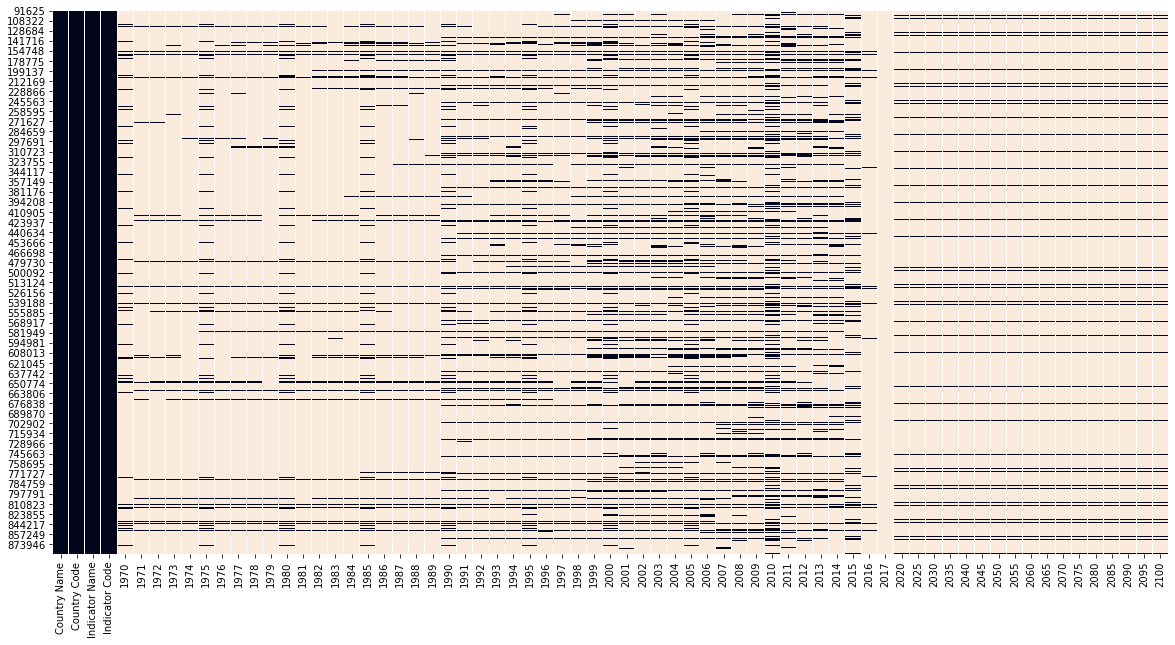

In [15]:
plt.figure(figsize=(20,10))
sns.heatmap(ed_stats_data.isna(),cbar=False)

### Nombre de variables
#### Nous avons : 3665 variables observées pour 192 pays. (3665*192=703680)

In [16]:
ed_stats_data['Indicator Code'].value_counts()

SABER.TECH.GOAL1.LVL2    192
SABER.GRVT.GOAL7.LVL2    192
PRJ.POP.2529.3.MF        192
PRJ.ATT.2024.NED.MF      192
UIS.XUNIT.US.56.FSGOV    192
                        ... 
PRJ.ATT.80UP.4.MA        192
LO.PIAAC.LIT.P90         192
UIS.DR.2.GPV.G2.M        192
HH.MICS.PCR.M            192
HH.DHS.YRS.15UP.GIN.F    192
Name: Indicator Code, Length: 3665, dtype: int64

### Utilisation de mots clés pour réduire le nombre de variables et éliminer celles qui semblent innutiles
#### A partir de la base "ed_stats_series", dans la colonne "Long definition", on récupère tous les indicateurs contenant les mots clés qui semblent pouvoir répondre   aux questions de déploiement du business à l'international de l'entreprise  
Résultat : 1985 variables à appliquer à la base de donnéees initiale

In [17]:
cles_indicateurs = ['growth','users','internet','GDP','expenditure','enrolment','education','population']
Codes_retenus= ed_stats_series[ed_stats_series['Long definition'].str.contains('|'.join(cles_indicateurs))]
indicateurs = pd.DataFrame(columns=['Series Code']) # Selection de la colonne "Series Code"
for i in Codes_retenus.iterrows():   # Parcourir la colonne des codes retenus "Series Code" et associe les "Indicator Name"
    indicateurs = indicateurs.append(pd.DataFrame([[i[1]['Series Code'],i[1]['Indicator Name']]],columns=['Series Code','Indicator Name']))
indicateurs

Series Code  \
0           BAR.NOED.1519.FE.ZS   
0              BAR.NOED.1519.ZS   
0           BAR.NOED.15UP.FE.ZS   
0              BAR.NOED.15UP.ZS   
0           BAR.NOED.2024.FE.ZS   
..                          ...   
0     UIS.XUNIT.USCONST.3.FSGOV   
0     UIS.XUNIT.USCONST.4.FSGOV   
0    UIS.XUNIT.USCONST.56.FSGOV   
0   XGDP.23.FSGOV.FDINSTADM.FFD   
0   XGDP.56.FSGOV.FDINSTADM.FFD   

                                       Indicator Name  
0   Barro-Lee: Percentage of female population age...  
0   Barro-Lee: Percentage of population age 15-19 ...  
0   Barro-Lee: Percentage of female population age...  
0   Barro-Lee: Percentage of population age 15+ wi...  
0   Barro-Lee: Percentage of female population age...  
..                                                ...  
0   Government expenditure per upper secondary stu...  
0   Government expenditure per post-secondary non-...  
0   Government expenditure per tertiary student (c...  
0   Government expenditure in secondary institutio...  
0   Government expenditure in tertiary institution...  

[1985 rows x 2 columns]

## Application du filtre des indicateurs retenus sur la DataFrame "ed_stats_data"
Résultat = 385344 observations

In [18]:
data_indicator_filtre = ed_stats_data[ed_stats_data['Indicator Code'].str.contains('|'.join(indicateurs['Series Code']))]
data_indicator_filtre.shape

(385344, 69)

In [19]:
data_indicator_filtre.head(5)

Country Name Country Code  \
91625  Afghanistan          AFG   
91626  Afghanistan          AFG   
91627  Afghanistan          AFG   
91628  Afghanistan          AFG   
91629  Afghanistan          AFG   

                                          Indicator Name  Indicator Code  \
91625  Adjusted net enrolment rate, lower secondary, ...      UIS.NERA.2   
91626  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.F   
91627  Adjusted net enrolment rate, lower secondary, ...  UIS.NERA.2.GPI   
91628  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.M   
91629  Adjusted net enrolment rate, primary, both sex...     SE.PRM.TENR   

       1970  1971  1972  1973      1974  1975  1976  1977  1978  1979  1980  \
91625   NaN   NaN   NaN   NaN   7.05911   NaN   NaN   NaN   NaN   NaN   NaN   
91626   NaN   NaN   NaN   NaN   2.53138   NaN   NaN   NaN   NaN   NaN   NaN   
91627   NaN   NaN   NaN   NaN   0.22154   NaN   NaN   NaN   NaN   NaN   NaN   
91628   NaN   NaN   NaN   NaN  11.42652   NaN   NaN   NaN   NaN   NaN   NaN   
91629   NaN   NaN   NaN   NaN       NaN   NaN   NaN   NaN   NaN   NaN   NaN   

       1981  1982  1983  1984  1985  1986  1987  1988  1989  1990  1991  1992  \
91625   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
91626   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
91627   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
91628   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
91629   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

            1993  1994  1995  1996  1997  1998  1999  2000  2001  2002  2003  \
91625  17.260189   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
91626   9.431810   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
91627   0.386230   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
91628  24.420429   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
91629        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

       2004  2005  2006       2007  2008  2009  2010  2011  2012       2013  \
91625   NaN   NaN   NaN  28.059870   NaN   NaN   NaN   NaN   NaN  47.436790   
91626   NaN   NaN   NaN  15.223100   NaN   NaN   NaN   NaN   NaN  34.073261   
91627   NaN   NaN   NaN   0.379130   NaN   NaN   NaN   NaN   NaN   0.567060   
91628   NaN   NaN   NaN  40.152851   NaN   NaN   NaN   NaN   NaN  60.087059   
91629   NaN   NaN   NaN        NaN   NaN   NaN   NaN   NaN   NaN        NaN   

            2014  2015  2016  2017  2020  2025  2030  2035  2040  2045  2050  \
91625  50.627232   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
91626  37.641541   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
91627   0.598370   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
91628  62.906952   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
91629        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

       2055  2060  2065  2070  2075  2080  2085  2090  2095  2100  
91625   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
91626   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
91627   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
91628   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
91629   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN

In [20]:
data_indicator_filtre['Indicator Code'].value_counts()

SL.TLF.BASC.ZS          192
UIS.PRP.0               192
BAR.SEC.ICMP.25UP.ZS    192
PRJ.ATT.2024.NED.MA     192
UIS.AFR.GTCTR.1.M       192
                       ... 
UIS.GGR.2.M             192
PRJ.POP.1519.3.MA       192
SE.PRM.PRSL.FE.ZS       192
HH.DHS.GAR.456.Q2       192
PRJ.ATT.4064.1.MA       192
Name: Indicator Code, Length: 2007, dtype: int64

### Ajout des colonnes "Region" et "Income Group" à la DataFrame "Ed_Stats_data" initiale

In [21]:
ed_stats_country = ed_stats_country[['Country Code', 'Region','Income Group']]
data_F = pd.merge(data_indicator_filtre,ed_stats_country,how="left", on=["Country Code"])

cols = data_indicator_filtre.columns
colonnes = list(['Region','Income Group'])
joined_list = [*colonnes, *cols]
data_F = data_F[joined_list]

In [22]:
data_F.shape

(385344, 71)

In [23]:
ed_stats_data.shape

(703680, 69)

In [24]:
data_F

Region Income Group Country Name Country Code  \
0               South Asia   Low income  Afghanistan          AFG   
1               South Asia   Low income  Afghanistan          AFG   
2               South Asia   Low income  Afghanistan          AFG   
3               South Asia   Low income  Afghanistan          AFG   
4               South Asia   Low income  Afghanistan          AFG   
...                    ...          ...          ...          ...   
385339  Sub-Saharan Africa   Low income     Zimbabwe          ZWE   
385340  Sub-Saharan Africa   Low income     Zimbabwe          ZWE   
385341  Sub-Saharan Africa   Low income     Zimbabwe          ZWE   
385342  Sub-Saharan Africa   Low income     Zimbabwe          ZWE   
385343  Sub-Saharan Africa   Low income     Zimbabwe          ZWE   

                                           Indicator Name  \
0       Adjusted net enrolment rate, lower secondary, ...   
1       Adjusted net enrolment rate, lower secondary, ...   
2       Adjusted net enrolment rate, lower secondary, ...   
3       Adjusted net enrolment rate, lower secondary, ...   
4       Adjusted net enrolment rate, primary, both sex...   
...                                                   ...   
385339  Wittgenstein Projection: Population in thousan...   
385340  Youth illiterate population, 15-24 years, % fe...   
385341  Youth literacy rate, population 15-24 years, b...   
385342  Youth literacy rate, population 15-24 years, f...   
385343  Youth literacy rate, population 15-24 years, m...   

              Indicator Code  1970  1971  1972  1973      1974  1975  1976  \
0                 UIS.NERA.2   NaN   NaN   NaN   NaN   7.05911   NaN   NaN   
1               UIS.NERA.2.F   NaN   NaN   NaN   NaN   2.53138   NaN   NaN   
2             UIS.NERA.2.GPI   NaN   NaN   NaN   NaN   0.22154   NaN   NaN   
3               UIS.NERA.2.M   NaN   NaN   NaN   NaN  11.42652   NaN   NaN   
4                SE.PRM.TENR   NaN   NaN   NaN   NaN       NaN   NaN   NaN   
...                      ...   ...   ...   ...   ...       ...   ...   ...   
385339      PRJ.POP.ALL.3.MF   NaN   NaN   NaN   NaN       NaN   NaN   NaN   
385340       UIS.LPP.AG15T24   NaN   NaN   NaN   NaN       NaN   NaN   NaN   
385341     SE.ADT.1524.LT.ZS   NaN   NaN   NaN   NaN       NaN   NaN   NaN   
385342  SE.ADT.1524.LT.FE.ZS   NaN   NaN   NaN   NaN       NaN   NaN   NaN   
385343  SE.ADT.1524.LT.MA.ZS   NaN   NaN   NaN   NaN       NaN   NaN   NaN   

        1977  1978  1979  1980  1981       1982  1983  1984  1985  1986  1987  \
0        NaN   NaN   NaN   NaN   NaN        NaN   NaN   NaN   NaN   NaN   NaN   
1        NaN   NaN   NaN   NaN   NaN        NaN   NaN   NaN   NaN   NaN   NaN   
2        NaN   NaN   NaN   NaN   NaN        NaN   NaN   NaN   NaN   NaN   NaN   
3        NaN   NaN   NaN   NaN   NaN        NaN   NaN   NaN   NaN   NaN   NaN   
4        NaN   NaN   NaN   NaN   NaN        NaN   NaN   NaN   NaN   NaN   NaN   
...      ...   ...   ...   ...   ...        ...   ...   ...   ...   ...   ...   
385339   NaN   NaN   NaN   NaN   NaN        NaN   NaN   NaN   NaN   NaN   NaN   
385340   NaN   NaN   NaN   NaN   NaN  71.083336   NaN   NaN   NaN   NaN   NaN   
385341   NaN   NaN   NaN   NaN   NaN  89.021851   NaN   NaN   NaN   NaN   NaN   
385342   NaN   NaN   NaN   NaN   NaN  84.812241   NaN   NaN   NaN   NaN   NaN   
385343   NaN   NaN   NaN   NaN   NaN  93.826958   NaN   NaN   NaN   NaN   NaN   

        1988  1989  1990  1991       1992       1993  1994  1995  1996  1997  \
0        NaN   NaN   NaN   NaN        NaN  17.260189   NaN   NaN   NaN   NaN   
1        NaN   NaN   NaN   NaN        NaN   9.431810   NaN   NaN   NaN   NaN   
2        NaN   NaN   NaN   NaN        NaN   0.386230   NaN   NaN   NaN   NaN   
3        NaN   NaN   NaN   NaN        NaN  24.420429   NaN   NaN   NaN   NaN   
4        NaN   NaN   NaN   NaN        NaN        NaN   NaN   NaN   NaN   NaN   
...      ...   ...   ...   ...        ...        ...   ...   ...   .

### Synthèse Dataframe filtrée avec les indicateurs retenus VS DataFrame initiale

In [25]:
synthese_DataFrames(data_F)

--------Synthèse dataframe : ['_', 'data_F', '_24']-------------

Nombre de colonnes : 71
Nombre de lignes : 385344
Nombre de cellules vides : 21366622
Nombre de lignes en doublons : 0

Types de colonnes : float64    65
object      6
dtype: int64

Pourcentage de cellules vides : Country Name      0.000000
Country Code      0.000000
Indicator Name    0.000000
Indicator Code    0.000000
Region            0.005208
                    ...   
1972              0.936400
1979              0.936407
1974              0.936493
2016              0.973268
2017              1.000000
Length: 71, dtype: float64




In [26]:
synthese_DataFrames(ed_stats_data)

--------Synthèse dataframe : ['ed_stats_data', '_11']-------------

Nombre de colonnes : 69
Nombre de lignes : 703680
Nombre de cellules vides : 41200638
Nombre de lignes en doublons : 0

Types de colonnes : float64    65
object      4
dtype: int64

Pourcentage de cellules vides : Country Name      0.000000
Country Code      0.000000
Indicator Name    0.000000
Indicator Code    0.000000
2010              0.685016
                    ...   
1974              0.957320
1972              0.957447
1973              0.957636
2016              0.979282
2017              0.999829
Length: 69, dtype: float64




## Matrice permetant de comparer les indicateurs pour tous les pays
### 1- Groupage par code indicateurs
### 2- Transposer la matrice pour pouvoir comparer les indicateurs

In [27]:
data_F_grouped_by_code=data_F.groupby(['Indicator Code']).mean(numeric_only=True)
data_F_grouped_by_code
data_F_grouped_by_code_transposed=data_F_grouped_by_code.T
data_F_grouped_by_code_transposed.shape

(65, 2007)

In [28]:
data_F_grouped_by_code_transposed.columns

Index(['BAR.NOED.1519.FE.ZS', 'BAR.NOED.1519.ZS', 'BAR.NOED.15UP.FE.ZS',
       'BAR.NOED.15UP.ZS', 'BAR.NOED.2024.FE.ZS', 'BAR.NOED.2024.ZS',
       'BAR.NOED.2529.FE.ZS', 'BAR.NOED.2529.ZS', 'BAR.NOED.25UP.FE.ZS',
       'BAR.NOED.25UP.ZS',
       ...
       'UIS.XUNIT.US.4.FSGOV', 'UIS.XUNIT.US.56.FSGOV',
       'UIS.XUNIT.USCONST.1.FSGOV', 'UIS.XUNIT.USCONST.2.FSGOV',
       'UIS.XUNIT.USCONST.23.FSGOV', 'UIS.XUNIT.USCONST.3.FSGOV',
       'UIS.XUNIT.USCONST.4.FSGOV', 'UIS.XUNIT.USCONST.56.FSGOV',
       'XGDP.23.FSGOV.FDINSTADM.FFD', 'XGDP.56.FSGOV.FDINSTADM.FFD'],
      dtype='object', name='Indicator Code', length=2007)

In [29]:
data_F_grouped_by_code_transposed

Indicator Code  BAR.NOED.1519.FE.ZS  BAR.NOED.1519.ZS  BAR.NOED.15UP.FE.ZS  \
1970                       29.78087         25.989855            43.692971   
1971                            NaN               NaN                  NaN   
1972                            NaN               NaN                  NaN   
1973                            NaN               NaN                  NaN   
1974                            NaN               NaN                  NaN   
...                             ...               ...                  ...   
2080                            NaN               NaN                  NaN   
2085                            NaN               NaN                  NaN   
2090                            NaN               NaN                  NaN   
2095                            NaN               NaN                  NaN   
2100                            NaN               NaN                  NaN   

Indicator Code  BAR.NOED.15UP.ZS  BAR.NOED.2024.FE.ZS  BAR.NOED.2024.ZS  \
1970                   38.205217            34.412029         29.557754   
1971                         NaN                  NaN               NaN   
1972                         NaN                  NaN               NaN   
1973                         NaN                  NaN               NaN   
1974                         NaN                  NaN               NaN   
...                          ...                  ...               ...   
2080                         NaN                  NaN               NaN   
2085                         NaN                  NaN               NaN   
2090                         NaN                  NaN               NaN   
2095                         NaN                  NaN               NaN   
2100                         NaN                  NaN               NaN   

Indicator Code  BAR.NOED.2529.FE.ZS  BAR.NOED.2529.ZS  BAR.NOED.25UP.FE.ZS  \
1970                      38.693043         33.281739            49.027029   
1971                            NaN               NaN                  NaN   
1972                            NaN               NaN                  NaN   
1973                            NaN               NaN                  NaN   
1974                            NaN               NaN                  NaN   
...                             ...               ...                  ...   
2080                            NaN               NaN                  NaN   
2085                            NaN               NaN                  NaN   
2090                            NaN               NaN                  NaN   
2095                            NaN               NaN                  NaN   
2100                            NaN               NaN                  NaN   

Indicator Code  BAR.NOED.25UP.ZS  BAR.NOED.3034.FE.ZS  BAR.NOED.3034.ZS  \
1970                    43.21558            40.941304         35.542826   
1971                         NaN                  NaN               NaN   
1972                         NaN                  NaN               NaN   
1973                         NaN                  NaN               NaN   
1974                         NaN                  NaN               NaN   
...                          ...                  ...               ...   
2080                         NaN                  NaN               NaN   
2085                         NaN                  NaN               NaN   
2090                         NaN                  NaN               NaN   
2095                         NaN                  NaN               NaN   
2100                         NaN                  NaN               NaN   

Indicator Code  BAR.NOED.3539.FE.ZS  BAR.NOED.3539.ZS  BAR.NOED.4044.FE.ZS  \
1970                      46.389565         40.300435            47.963406   
1971                            NaN               NaN                  NaN   
1972                            NaN               NaN                  NaN   
1973        

### Ajouter un nouvelle colonne "SE.SEC_TER.ENRL" : Nombre d'inscrits au lycée + université (Somme de "SE.SEC.ENRL" + "SE.TER.ENRL")

In [30]:
data_F_grouped_by_code_transposed["SE.SEC_TER.ENRL"]=data_F_grouped_by_code_transposed[["SE.SEC.ENRL"]+["SE.TER.ENRL"]].sum(axis=1)
data_F_grouped_by_code_transposed.shape

(65, 2008)

## Synthèse Dataframe des indicateurs retenus par années

In [31]:
synthese_DataFrames(data_F_grouped_by_code_transposed)

--------Synthèse dataframe : ['__', 'data_F_grouped_by_code_transposed', '_29']-------------

Nombre de colonnes : 2008
Nombre de lignes : 65
Nombre de cellules vides : 90163
Nombre de lignes en doublons : 0

Types de colonnes : float64    2008
dtype: int64

Pourcentage de cellules vides : Indicator Code
SE.SEC_TER.ENRL           0.000000
SE.PRM.REPT.MA.ZS         0.276923
SE.PRM.REPT.ZS            0.276923
SE.PRM.TCHR               0.276923
SE.PRM.TCHR.FE            0.276923
                            ...   
LO.PASEC.REA.6.PP         0.984615
LO.PASEC.REA.6.PP.GAP     0.984615
LO.PASEC.REA.6.PRI.GAP    0.984615
LO.PASEC.MAT.6.PP         0.984615
LO.PASEC.REA.6.NPP        0.984615
Length: 2008, dtype: float64




## Taux de remplissage de la matrice indicateurs

<AxesSubplot:xlabel='Indicator Code'>

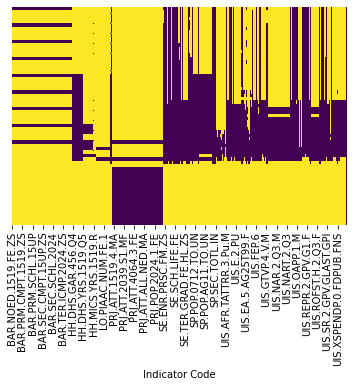

In [32]:
sns.heatmap(data_F_grouped_by_code_transposed.isnull(),yticklabels=False,cbar=False,cmap="viridis")

# correlation entre les indicateurs (période = 2000-2017)

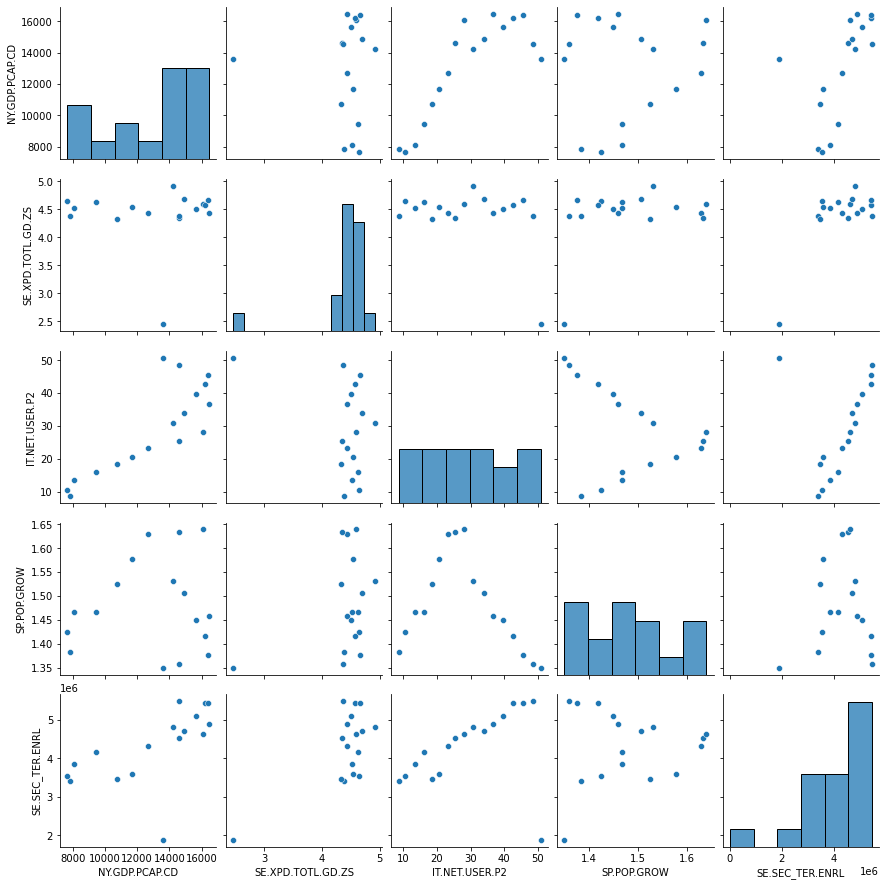

In [33]:
indicateurs_annee = data_F_grouped_by_code_transposed[['NY.GDP.PCAP.CD','SE.XPD.TOTL.GD.ZS','IT.NET.USER.P2','SP.POP.GROW','SE.SEC_TER.ENRL']].loc['2000':'2017']
sns_plot = sns.pairplot(indicateurs_annee)

### Corelation entre PIB et acces internet 

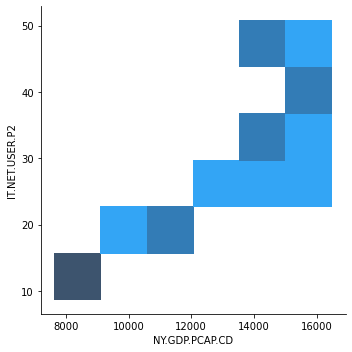

In [34]:
sns.displot(data=indicateurs_annee,x="NY.GDP.PCAP.CD",y="IT.NET.USER.P2")

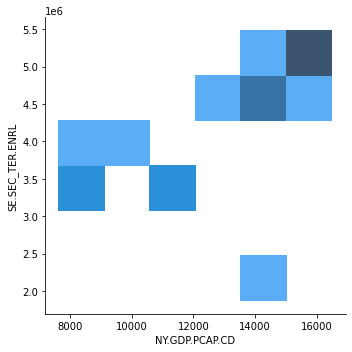

In [75]:
sns.displot(data=indicateurs_annee,x="NY.GDP.PCAP.CD",y="SE.SEC_TER.ENRL")

C:\Users\abdel\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\abdel\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\abdel\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

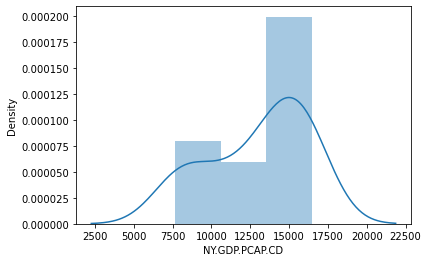

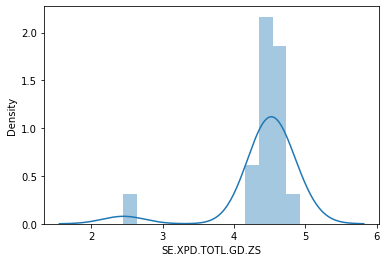

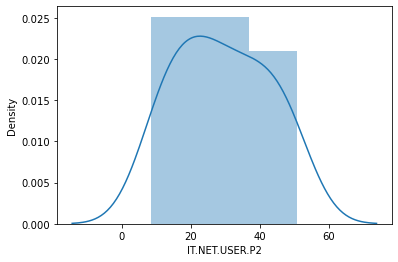

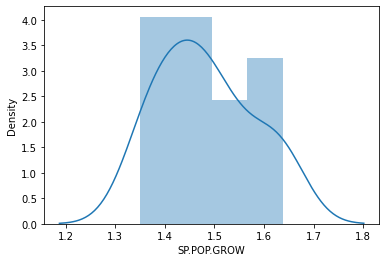

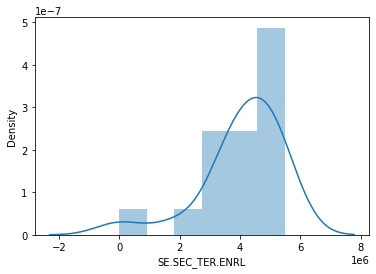

In [35]:
for col in indicateurs_annee.select_dtypes('float'):
    plt.figure()
    sns.distplot(indicateurs_annee[col])

In [36]:
for col in data_F.select_dtypes('object'):
    print(f'{col :-<10} {data_F[col].unique()}')

Region---- ['South Asia' 'Europe & Central Asia' 'Middle East & North Africa'
 'Sub-Saharan Africa' 'Latin America & Caribbean' 'East Asia & Pacific'
 'North America' nan]
Income Group ['Low income' 'Upper middle income' 'High income: nonOECD'
 'Lower middle income' 'High income: OECD' nan]
Country Name ['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola' 'Argentina'
 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas, The' 'Bahrain'
 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Benin' 'Bolivia'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Bulgaria' 'Burkina Faso'
 'Burundi' 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo, Dem. Rep.' 'Congo, Rep.' 'Costa Rica' "Cote d'Ivoire" 'Croatia'
 'Cuba' 'Curacao' 'Cyprus' 'Czech Republic' 'Denmark' 'Djibouti'
 'Dominica' 'Dominican Republic' 'Ecuador' 'Egypt, Arab Rep.'
 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Ethiopia'
 'Finland' 'France' 'French Po

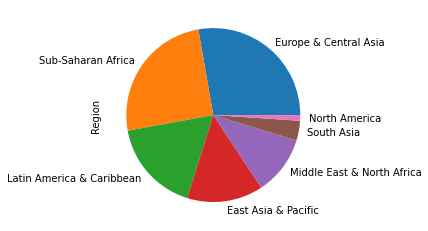

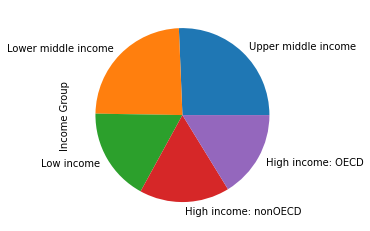

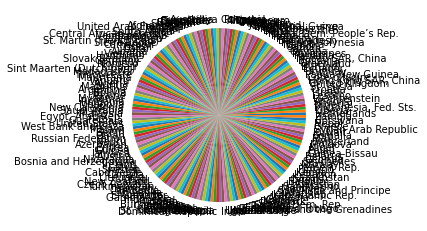

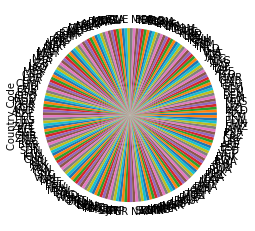

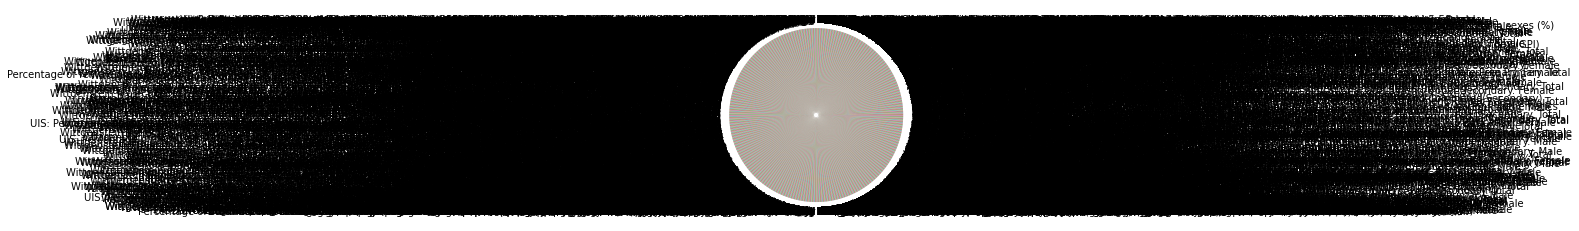

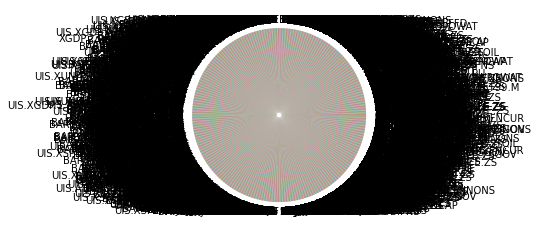

In [37]:
for col in data_F.select_dtypes('object'):
    plt.figure()
    data_F[col].value_counts().plot.pie()

## Analyse _par_region

In [38]:
df_Regions=data_F.groupby(['Region']).mean(numeric_only=True).T
df_Regions

Region  East Asia & Pacific  Europe & Central Asia  Latin America & Caribbean  \
1970           3.673581e+08           4.519855e+08               1.299611e+08   
1971           1.084144e+09           1.415795e+09               3.585266e+08   
1972           1.215255e+09           1.529034e+09               3.915635e+08   
1973           1.341886e+09           1.649172e+09               4.557145e+08   
1974           1.393589e+09           1.696659e+09               5.028042e+08   
...                     ...                    ...                        ...   
2080           5.435603e+02           1.257737e+02               1.778294e+02   
2085           5.221422e+02           1.245329e+02               1.751445e+02   
2090           5.013114e+02           1.233307e+02               1.721095e+02   
2095           4.815801e+02           1.220105e+02               1.687695e+02   
2100           4.630443e+02           1.204564e+02               1.651959e+02   

Region  Middle East & North Africa  North America    South Asia  \
1970                  7.168037e+07   7.683811e+09  1.109439e+08   
1971                  1.717763e+08   2.923085e+10  4.439172e+08   
1972                  2.060090e+08   3.012797e+10  4.852344e+08   
1973                  2.076240e+08   3.777418e+10  4.412157e+08   
1974                  2.446670e+08   3.503128e+10  4.820464e+08   
...                            ...            ...           ...   
2080                  2.350178e+02   1.656770e+03  2.997714e+03   
2085                  2.345879e+02   1.676988e+03  2.955954e+03   
2090                  2.335469e+02   1.689996e+03  2.909551e+03   
2095                  2.319202e+02   1.697779e+03  2.854385e+03   
2100                  2.295580e+02   1.701668e+03  2.789531e+03   

Region  Sub-Saharan Africa  
1970          2.648622e+07  
1971          5.922038e+07  
1972          6.170580e+07  
1973          7.011474e+07  
1974          7.979582e+07  
...                    ...  
2080          3.461208e+02  
2085          3.544100e+02  
2090          3.613149e+02  
2095          3.665779e+02  
2100          3.703122e+02  

[65 rows x 7 columns]

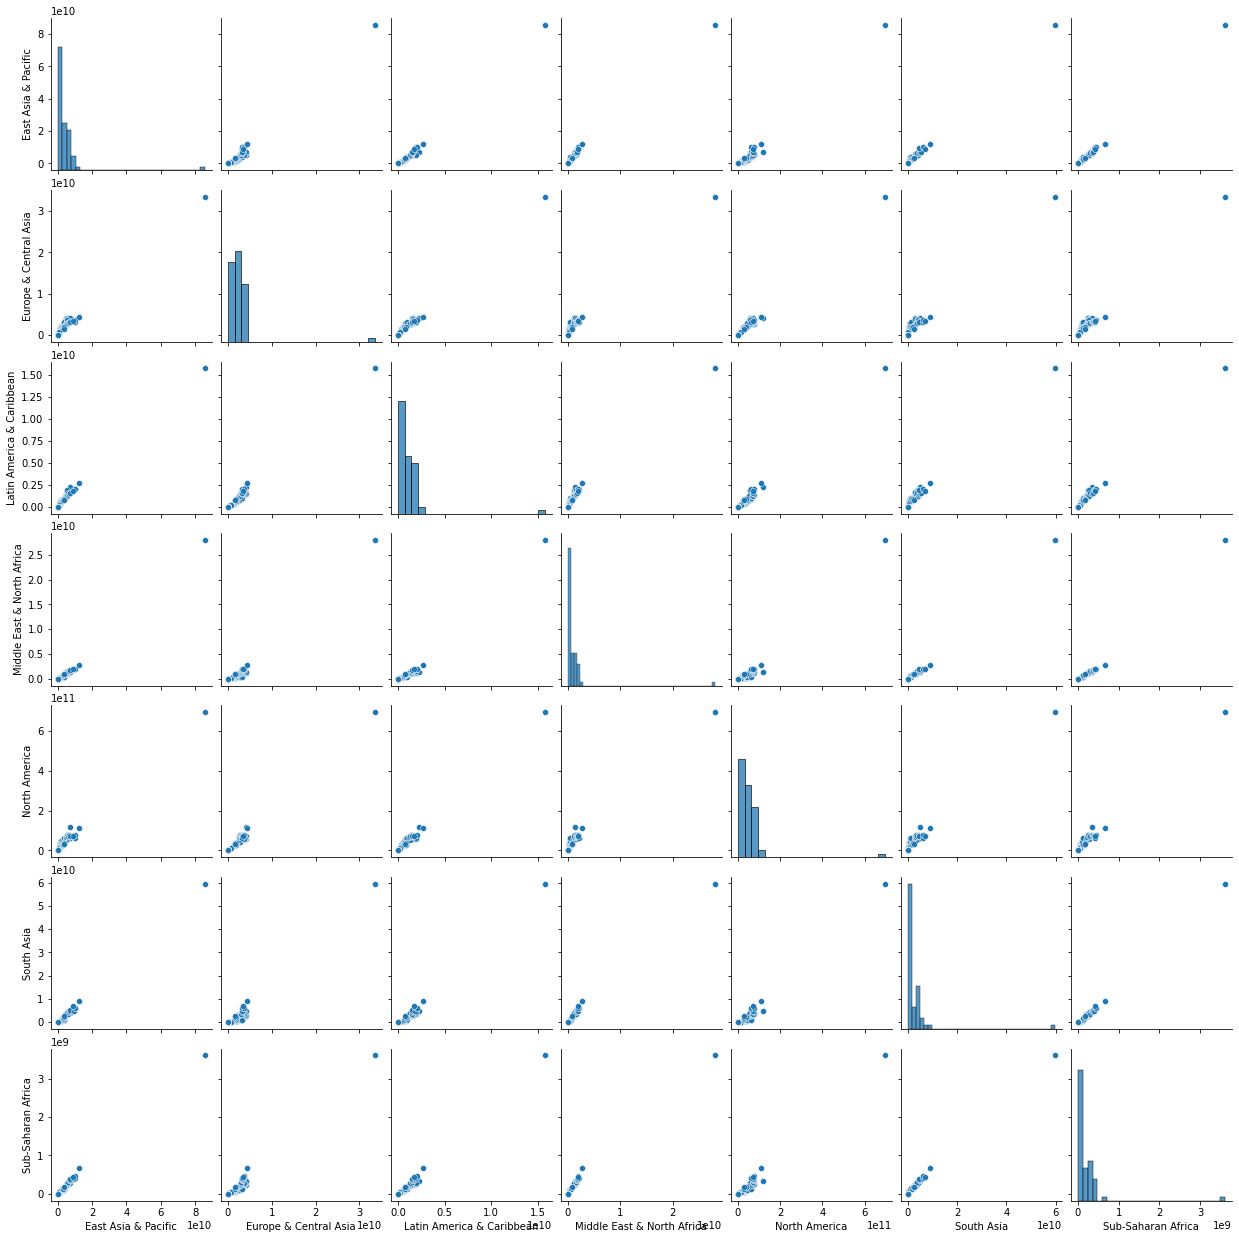

In [39]:
sns.pairplot(df_Regions)

<AxesSubplot:xlabel='Region', ylabel='Region'>

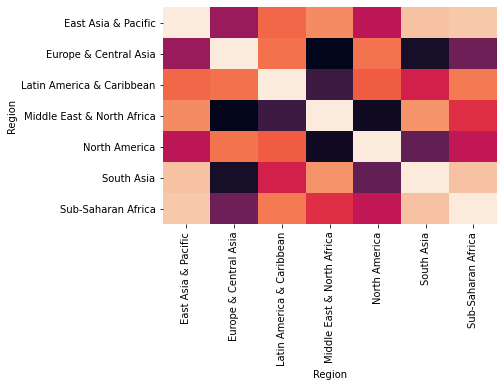

In [40]:
sns.heatmap(df_Regions.corr(),cbar=0)

## Analyse par région et par indicateur

In [41]:
df_Regions_indicateurs=data_F.groupby(['Region','Indicator Code']).mean()
df_Regions_indicateurs

1970  1971  1972  1973  \
Region              Indicator Code                                             
East Asia & Pacific BAR.NOED.1519.FE.ZS          17.395556   NaN   NaN   NaN   
                    BAR.NOED.1519.ZS             15.717778   NaN   NaN   NaN   
                    BAR.NOED.15UP.FE.ZS          38.036111   NaN   NaN   NaN   
                    BAR.NOED.15UP.ZS             31.626111   NaN   NaN   NaN   
                    BAR.NOED.2024.FE.ZS          20.190556   NaN   NaN   NaN   
...                                                    ...   ...   ...   ...   
Sub-Saharan Africa  UIS.XUNIT.USCONST.3.FSGOV          NaN   NaN   NaN   NaN   
                    UIS.XUNIT.USCONST.4.FSGOV          NaN   NaN   NaN   NaN   
                    UIS.XUNIT.USCONST.56.FSGOV         NaN   NaN   NaN   NaN   
                    XGDP.23.FSGOV.FDINSTADM.FFD        NaN   NaN   NaN   NaN   
                    XGDP.56.FSGOV.FDINSTADM.FFD        NaN   NaN   NaN   NaN   

                                                 1974       1975  1976  1977  \
Region              Indicator Code                                             
East Asia & Pacific BAR.NOED.1519.FE.ZS           NaN  14.567778   NaN   NaN   
                    BAR.NOED.1519.ZS              NaN  13.338333   NaN   NaN   
                    BAR.NOED.15UP.FE.ZS           NaN  31.851111   NaN   NaN   
                    BAR.NOED.15UP.ZS              NaN  26.356667   NaN   NaN   
                    BAR.NOED.2024.FE.ZS           NaN  16.686667   NaN   NaN   
...                                               ...        ...   ...   ...   
Sub-Saharan Africa  UIS.XUNIT.USCONST.3.FSGOV     NaN        NaN   NaN   NaN   
                    UIS.XUNIT.USCONST.4.FSGOV     NaN        NaN   NaN   NaN   
                    UIS.XUNIT.USCONST.56.FSGOV    NaN        NaN   NaN   NaN   
                    XGDP.23.FSGOV.FDINSTADM.FFD   NaN        NaN   NaN   NaN   
                    XGDP.56.FSGOV.FDINSTADM.FFD   NaN        NaN   NaN   NaN   

                                                 1978  1979       1980  1981  \
Region              Indicator Code                                             
East Asia & Pacific BAR.NOED.1519.FE.ZS           NaN   NaN  10.822222   NaN   
                    BAR.NOED.1519.ZS              NaN   NaN   9.761111   NaN   
                    BAR.NOED.15UP.FE.ZS           NaN   NaN  26.897778   NaN   
                    BAR.NOED.15UP.ZS              NaN   NaN  22.103889   NaN   
                    BAR.NOED.2024.FE.ZS           NaN   NaN  12.558889   NaN   
...                                               ...   ...        ...   ...   
Sub-Saharan Africa  UIS.XUNIT.USCONST.3.FSGOV     NaN   NaN        NaN   NaN   
                    UIS.XUNIT.USCONST.4.FSGOV     NaN   NaN        NaN   NaN   
                    UIS.XUNIT.USCONST.56.FSGOV    NaN   NaN        NaN   NaN   
                    XGDP.23.FSGOV.FDINSTADM.FFD   NaN   NaN        NaN   NaN   
                    XGDP.56.FSGOV.FDINSTADM.FFD   NaN   NaN        NaN   NaN   

                                                 1982  1983  1984       1985  \
Region              Indicator Code                                             
East Asia & Pacific BAR.NOED.1519.FE.ZS           NaN   NaN   NaN   9.528889   
                    BAR.NOED.1519.ZS              NaN   NaN   NaN   8.667222   
                    BAR.NOED.15UP.FE.ZS           NaN   NaN   NaN  23.536667   
                    BAR.NOED.15UP.ZS              NaN   NaN   NaN  19.215000   
                    BAR.NOED.2024.FE.ZS           NaN   NaN   NaN  13.719444   
...                                               ...   ...   ...        ...   
Sub-Saharan Africa  UIS.XUNIT.USCONST.3.FSGOV     NaN   NaN   NaN        NaN   
                    UIS.XUNIT.USCONST.4.FSGOV     NaN   NaN   NaN        NaN   
                    UIS.XUNIT.USCONST.56.FSGOV    NaN   NaN   NaN        NaN   
                    XGDP.23.FSGOV.FDINSTADM.FFD   N

### Afficher l'évolution de chaque indicateur par région

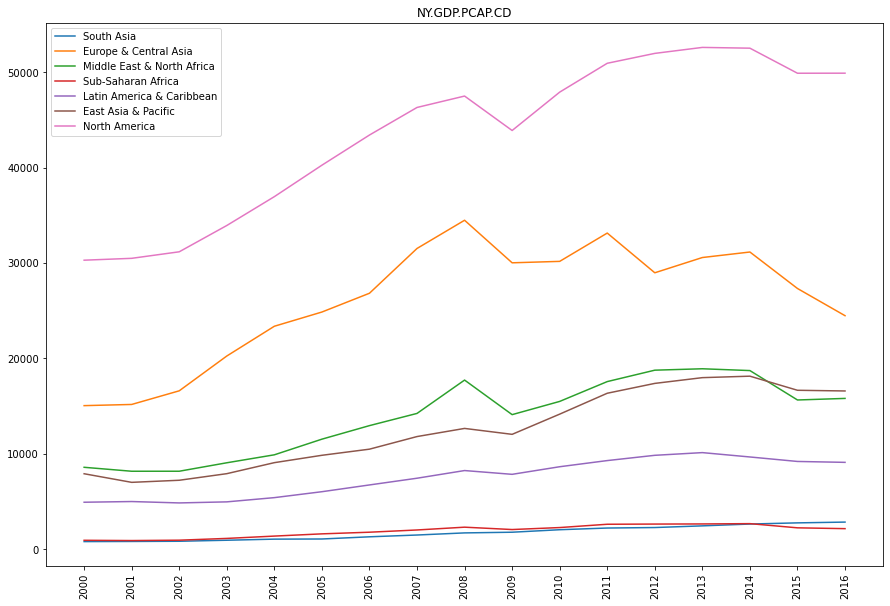

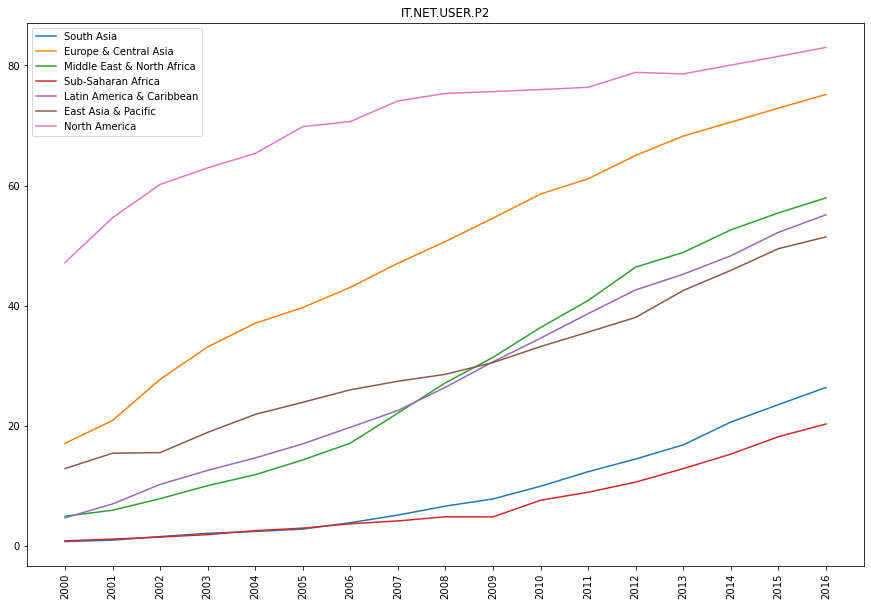

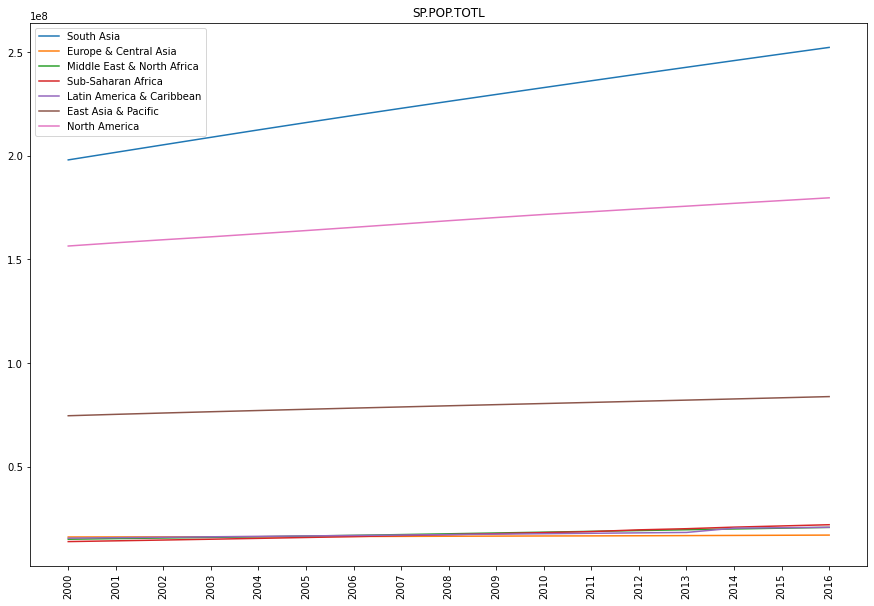

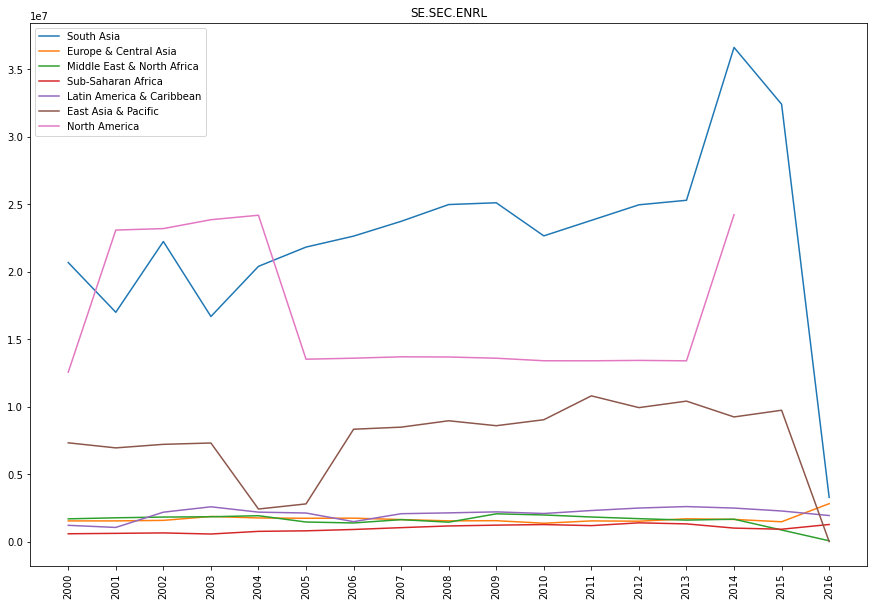

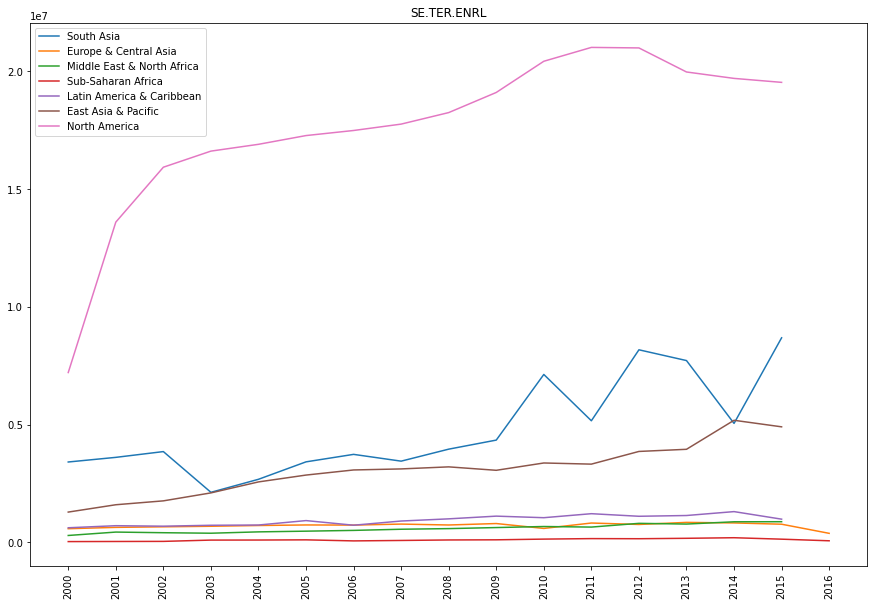

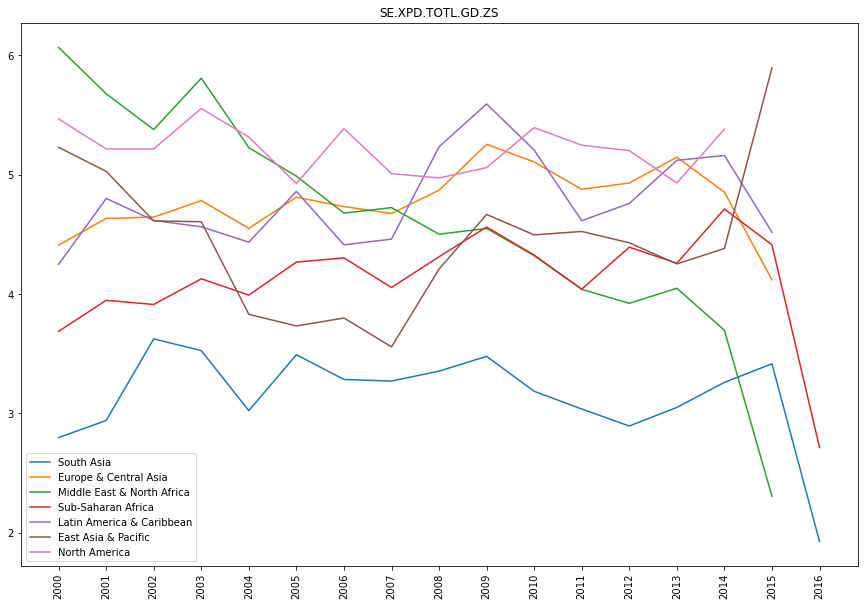

In [42]:
indicateurs = ['NY.GDP.PCAP.CD','IT.NET.USER.P2','SP.POP.TOTL','SE.SEC.ENRL','SE.TER.ENRL','SE.XPD.TOTL.GD.ZS']
for i in indicateurs:
    figure = plt.figure(figsize=(15,10))
    plt.title(i)
    plt.xticks(rotation=90)
    for j in data_F['Region'].dropna().unique():
        if len(df_Regions_indicateurs.loc[j,i].dropna())>0:
            plt.plot(df_Regions_indicateurs.loc[j,i].loc['2000':'2020'],label=j)
            # On peut calculer la tendance future pour chaque indicateur
            plt.legend()

In [43]:
df_codes_pays = data_F.groupby(['Country Name','Indicator Code']).mean()
df_codes_pays

1970  1971  1972  1973  1974  \
Country Name Indicator Code                                               
Afghanistan  BAR.NOED.1519.FE.ZS          91.44   NaN   NaN   NaN   NaN   
             BAR.NOED.1519.ZS             77.08   NaN   NaN   NaN   NaN   
             BAR.NOED.15UP.FE.ZS          97.21   NaN   NaN   NaN   NaN   
             BAR.NOED.15UP.ZS             88.81   NaN   NaN   NaN   NaN   
             BAR.NOED.2024.FE.ZS          94.80   NaN   NaN   NaN   NaN   
...                                         ...   ...   ...   ...   ...   
Zimbabwe     UIS.XUNIT.USCONST.3.FSGOV      NaN   NaN   NaN   NaN   NaN   
             UIS.XUNIT.USCONST.4.FSGOV      NaN   NaN   NaN   NaN   NaN   
             UIS.XUNIT.USCONST.56.FSGOV     NaN   NaN   NaN   NaN   NaN   
             XGDP.23.FSGOV.FDINSTADM.FFD    NaN   NaN   NaN   NaN   NaN   
             XGDP.56.FSGOV.FDINSTADM.FFD    NaN   NaN   NaN   NaN   NaN   

                                           1975  1976  1977  1978  1979  \
Country Name Indicator Code                                               
Afghanistan  BAR.NOED.1519.FE.ZS          88.81   NaN   NaN   NaN   NaN   
             BAR.NOED.1519.ZS             72.24   NaN   NaN   NaN   NaN   
             BAR.NOED.15UP.FE.ZS          96.14   NaN   NaN   NaN   NaN   
             BAR.NOED.15UP.ZS             85.74   NaN   NaN   NaN   NaN   
             BAR.NOED.2024.FE.ZS          94.80   NaN   NaN   NaN   NaN   
...                                         ...   ...   ...   ...   ...   
Zimbabwe     UIS.XUNIT.USCONST.3.FSGOV      NaN   NaN   NaN   NaN   NaN   
             UIS.XUNIT.USCONST.4.FSGOV      NaN   NaN   NaN   NaN   NaN   
             UIS.XUNIT.USCONST.56.FSGOV     NaN   NaN   NaN   NaN   NaN   
             XGDP.23.FSGOV.FDINSTADM.FFD    NaN   NaN   NaN   NaN   NaN   
             XGDP.56.FSGOV.FDINSTADM.FFD    NaN   NaN   NaN   NaN   NaN   

                                           1980  1981  1982  1983  1984  \
Country Name Indicator Code                                               
Afghanistan  BAR.NOED.1519.FE.ZS          87.50   NaN   NaN   NaN   NaN   
             BAR.NOED.1519.ZS             68.20   NaN   NaN   NaN   NaN   
             BAR.NOED.15UP.FE.ZS          94.59   NaN   NaN   NaN   NaN   
             BAR.NOED.15UP.ZS             82.03   NaN   NaN   NaN   NaN   
             BAR.NOED.2024.FE.ZS          89.50   NaN   NaN   NaN   NaN   
...                                         ...   ...   ...   ...   ...   
Zimbabwe     UIS.XUNIT.USCONST.3.FSGOV      NaN   NaN   NaN   NaN   NaN   
             UIS.XUNIT.USCONST.4.FSGOV      NaN   NaN   NaN   NaN   NaN   
             UIS.XUNIT.USCONST.56.FSGOV     NaN   NaN   NaN   NaN   NaN   
             XGDP.23.FSGOV.FDINSTADM.FFD    NaN   NaN   NaN   NaN   NaN   
             XGDP.56.FSGOV.FDINSTADM.FFD    NaN   NaN   NaN   NaN   NaN   

                                           1985  1986  1987  1988  1989  \
Country Name Indicator Code                                               
Afghanistan  BAR.NOED.1519.FE.ZS          85.50   NaN   NaN   NaN   NaN   
             BAR.NOED.1519.ZS             62.18   NaN   NaN   NaN   NaN   
             BAR.NOED.15UP.FE.ZS          92.84   NaN   NaN   NaN   NaN   
             BAR.NOED.15UP.ZS             77.80   NaN   NaN   NaN   NaN   
             BAR.NOED.2024.FE.ZS          88.19   NaN   NaN   NaN   NaN   
...                                         ...   ...   ...   ...   ...   
Zimbabwe     UIS.XUNIT.USCONST.3.FSGOV      NaN   NaN   NaN   NaN   NaN   
             UIS.XUNIT.USCONST.4.FSGOV      NaN   NaN   NaN   NaN   NaN   
             UIS.XUNIT.USCONST.56.FSGOV     NaN   NaN   NaN   NaN   NaN   
             XGDP.23.FSGOV.FDINSTADM.FFD    NaN   NaN   NaN   NaN   NaN   
             XGDP.56.FSGOV.FDINSTADM.FFD    NaN   NaN   NaN   NaN   NaN   

                                           1990  1991  1992  1993  1994  \
Country Name Indicator Code                                     

In [44]:
synthese_DataFrames(df_codes_pays)

--------Synthèse dataframe : ['_', 'df_codes_pays', '_43']-------------

Nombre de colonnes : 65
Nombre de lignes : 385344
Nombre de cellules vides : 21362608
Nombre de lignes en doublons : 144324

Types de colonnes : float64    65
dtype: int64

Pourcentage de cellules vides : 2010    0.509960
2005    0.652326
2000    0.670609
1995    0.748235
2015    0.750869
          ...   
1972    0.936400
1979    0.936407
1974    0.936493
2016    0.973268
2017    1.000000
Length: 65, dtype: float64




### Grouper par indicateur /pays

In [45]:
df_codes_pays = data_F.groupby(['Indicator Code','Country Name','Country Code']).mean()
df_codes_pays

1970  1971  \
Indicator Code              Country Name       Country Code                
BAR.NOED.1519.FE.ZS         Afghanistan        AFG           91.44   NaN   
                            Albania            ALB           26.56   NaN   
                            Algeria            DZA           69.70   NaN   
                            Andorra            AND             NaN   NaN   
                            Angola             AGO             NaN   NaN   
...                                                            ...   ...   
XGDP.56.FSGOV.FDINSTADM.FFD Vietnam            VNM             NaN   NaN   
                            West Bank and Gaza PSE             NaN   NaN   
                            Yemen, Rep.        YEM             NaN   NaN   
                            Zambia             ZMB             NaN   NaN   
                            Zimbabwe           ZWE             NaN   NaN   

                                                             1972  1973  1974  \
Indicator Code              Country Name       Country Code                     
BAR.NOED.1519.FE.ZS         Afghanistan        AFG            NaN   NaN   NaN   
                            Albania            ALB            NaN   NaN   NaN   
                            Algeria            DZA            NaN   NaN   NaN   
                            Andorra            AND            NaN   NaN   NaN   
                            Angola             AGO            NaN   NaN   NaN   
...                                                           ...   ...   ...   
XGDP.56.FSGOV.FDINSTADM.FFD Vietnam            VNM            NaN   NaN   NaN   
                            West Bank and Gaza PSE            NaN   NaN   NaN   
                            Yemen, Rep.        YEM            NaN   NaN   NaN   
                            Zambia             ZMB            NaN   NaN   NaN   
                            Zimbabwe           ZWE            NaN   NaN   NaN   

                                                              1975  1976  \
Indicator Code              Country Name       Country Code                
BAR.NOED.1519.FE.ZS         Afghanistan        AFG           88.81   NaN   
                            Albania            ALB           12.08   NaN   
                            Algeria            DZA           58.22   NaN   
                            Andorra            AND             NaN   NaN   
                            Angola             AGO             NaN   NaN   
...                                                            ...   ...   
XGDP.56.FSGOV.FDINSTADM.FFD Vietnam            VNM             NaN   NaN   
                            West Bank and Gaza PSE             NaN   NaN   
                            Yemen, Rep.        YEM             NaN   NaN   
                            Zambia             ZMB             NaN   NaN   
                            Zimbabwe           ZWE             NaN   NaN   

                                                             1977  1978  1979  \
Indicator Code              Country Name       Country Code                     
BAR.NOED.1519.FE.ZS         Afghanistan        AFG            NaN   NaN   NaN   
                            Albania            ALB            NaN   NaN   NaN   
                            Algeria            DZA            NaN   NaN   NaN   
                            Andorra            AND            NaN   NaN   NaN   
                            Angola             AGO            NaN   NaN   NaN   
...                                                           ...   ...   ...   
XGDP.56.FSGOV.FDINSTADM.FFD Vietnam            VNM            NaN   NaN   NaN   
                            West Bank and Gaza PSE            NaN   NaN   NaN   
                            Yemen, Rep.        YEM            NaN   NaN   NaN   
                            Zambia             ZMB            NaN   NaN   NaN   
                            Zimbabwe           ZWE        

## Classement des pays par moyenne des PIB annuels (Dollar)

In [46]:
scores_PIB = pd.DataFrame(df_codes_pays.loc[['NY.GDP.PCAP.CD']].mean(axis=1).groupby(['Country Name']).mean(numeric_only=True))[0]
Classement_PIB = pd.DataFrame([scores_PIB.index,scores_PIB.values]).T
Classement_PIB = Classement_PIB.sort_values(by=[1],ascending=False)
Classement_PIB.columns = ['Country Name','PIB']
Classement_PIB= Classement_PIB.fillna(0)
Classement_PIB.head(70)

Country Name           PIB
110             Monaco  77275.558642
94       Liechtenstein  65997.115411
142         San Marino  60058.488941
96          Luxembourg  48239.257362
166        Switzerland  47336.684752
..                 ...           ...
112         Montenegro   5212.513288
57               Gabon   5185.724663
50   Equatorial Guinea   4955.872775
82          Kazakhstan   4924.388634
186      Venezuela, RB   4859.915143

[70 rows x 2 columns]

## Classement des pays par taux de connexion internet (% de la population connectée)

In [47]:
scores_web_access = pd.DataFrame(df_codes_pays.loc[['IT.NET.USER.P2']].mean(axis=1).groupby(['Country Name']).mean(numeric_only=True))[0]
Classement_web_access = pd.DataFrame([scores_web_access.index,scores_web_access.values]).T
Classement_web_access = Classement_web_access.sort_values(by=[1],ascending=False)
Classement_web_access.columns = ['Country Name','Taux_connect_net']
Classement_web_access= Classement_web_access.fillna(0)
Classement_web_access

Country Name  Taux_connect_net
94               Liechtenstein         68.874359
110                     Monaco         65.083306
71                     Iceland         59.601732
125                     Norway         57.951514
165                     Sweden         56.783539
..                         ...               ...
87                      Kosovo          0.000000
117                      Nauru          0.000000
150  Sint Maarten (Dutch part)          0.000000
155                South Sudan          0.000000
160   St. Martin (French part)          0.000000

[192 rows x 2 columns]

### Nombre de population Total par pays

In [48]:
total_population = pd.DataFrame(df_codes_pays.loc[['SP.POP.TOTL']].mean(axis=1).groupby(['Country Name']).mean(numeric_only=True))[0]
classement_total_population = pd.DataFrame([total_population.index,total_population.values]).T
classement_total_population = classement_total_population.sort_values(by=[1],ascending=False)
classement_total_population.columns = ['Country Name','Population']
classement_total_population= classement_total_population.fillna(0)
classement_total_population

Country Name    Population
31                      China  1.147783e+09
72                      India  9.297671e+08
182             United States  2.621861e+08
73                  Indonesia  1.891965e+08
20                     Brazil  1.550717e+08
..                        ...           ...
94              Liechtenstein  3.011698e+04
142                San Marino  2.546445e+04
160  St. Martin (French part)  2.138525e+04
128                     Palau  1.638419e+04
117                     Nauru  0.000000e+00

[192 rows x 2 columns]

### Nombre de population connectée à internet

In [49]:
connect_net = Classement_web_access[['Taux_connect_net','Country Name']]
Nbre_population_connectee = pd.merge(classement_total_population,connect_net,how="left", on=["Country Name"])
Nbre_population_connectee=Nbre_population_connectee.sort_values(by=['Population'],ascending=False)
Nbre_population_connectee

Country Name    Population  Taux_connect_net
0                       China  1.147783e+09         16.883452
1                       India  9.297671e+08          5.668691
2               United States  2.621861e+08         47.021176
3                   Indonesia  1.891965e+08          6.549042
4                      Brazil  1.550717e+08         20.940767
..                        ...           ...               ...
187             Liechtenstein  3.011698e+04         68.874359
188                San Marino  2.546445e+04         35.772322
189  St. Martin (French part)  2.138525e+04          0.000000
190                     Palau  1.638419e+04         17.203950
191                     Nauru  0.000000e+00          0.000000

[192 rows x 3 columns]

In [50]:
Nbre_population_connectee['Nbr_population_connectee'] = (Nbre_population_connectee['Population']*Nbre_population_connectee['Taux_connect_net'])/100
Nbre_population_connectee

Country Name    Population  Taux_connect_net  \
0                       China  1.147783e+09         16.883452   
1                       India  9.297671e+08          5.668691   
2               United States  2.621861e+08         47.021176   
3                   Indonesia  1.891965e+08          6.549042   
4                      Brazil  1.550717e+08         20.940767   
..                        ...           ...               ...   
187             Liechtenstein  3.011698e+04         68.874359   
188                San Marino  2.546445e+04         35.772322   
189  St. Martin (French part)  2.138525e+04          0.000000   
190                     Palau  1.638419e+04         17.203950   
191                     Nauru  0.000000e+00          0.000000   

     Nbr_population_connectee  
0                1.937854e+08  
1                5.270562e+07  
2                1.232830e+08  
3                1.239056e+07  
4                3.247319e+07  
..                        ...  
187              2.074288e+04  
188              9.109224e+03  
189              0.000000e+00  
190              2.818728e+03  
191              0.000000e+00  

[192 rows x 4 columns]

### Nombre d'étudiants inscrits au secondaire 

In [51]:
scores_sec_enrl = pd.DataFrame(df_codes_pays.loc[['SE.SEC.ENRL']].mean(axis=1).groupby(['Country Name']).mean(numeric_only=True))[0]
Classement_sec_enrl = pd.DataFrame([scores_sec_enrl.index,scores_sec_enrl.values]).T
Classement_sec_enrl = Classement_sec_enrl.sort_values(by=[1],ascending=False)
Classement_sec_enrl.columns = ['Country Name','Etudiants_Secondaire']
Classement_sec_enrl= Classement_sec_enrl.fillna(0)
Classement_sec_enrl.head(30)

Country Name  Etudiants_Secondaire
72                India          6.595196e+07
31                China          6.529156e+07
182       United States          2.224671e+07
20               Brazil          1.705137e+07
139  Russian Federation          1.302134e+07
73            Indonesia          1.212421e+07
80                Japan          9.088208e+06
60              Germany          7.928892e+06
12           Bangladesh          7.330288e+06
107              Mexico          7.325828e+06
74   Iran, Islamic Rep.          6.200675e+06
55               France          5.504420e+06
181      United Kingdom          5.112632e+06
127            Pakistan          5.022012e+06
48     Egypt, Arab Rep.          4.995809e+06
78                Italy          4.796542e+06
176              Turkey          4.749586e+06
154        South Africa          4.260424e+06
124             Nigeria          4.229721e+06
179             Ukraine          4.217701e+06
133         Philippines          4.127621e+06
187             Vietnam          4.108766e+06
86          Korea, Rep.          3.948447e+06
184          Uzbekistan          3.841709e+06
156               Spain          3.641055e+06
134              Poland          3.154874e+06
170            Thailand          3.050643e+06
32             Colombia          2.881899e+06
144        Saudi Arabia          2.591485e+06
5             Argentina          2.586759e+06

### Nombre d'étudiants inscrits à l'université 

In [52]:
scores_ter_enrl = pd.DataFrame(df_codes_pays.loc[['SE.TER.ENRL']].mean(axis=1).groupby(['Country Name']).mean(numeric_only=True))[0]
Classement_ter_enrl = pd.DataFrame([scores_ter_enrl.index,scores_ter_enrl.values]).T
Classement_ter_enrl = Classement_ter_enrl.sort_values(by=[1],ascending=False)
Classement_ter_enrl.columns = ['Country Name','Etudiants_Universite']
Classement_ter_enrl= Classement_ter_enrl.fillna(0)
Classement_ter_enrl

Country Name  Etudiants_Universite
182             United States          1.429093e+07
31                      China          1.135660e+07
72                      India          1.025736e+07
139        Russian Federation          6.271126e+06
80                      Japan          3.095584e+06
..                        ...                   ...
87                     Kosovo          0.000000e+00
110                    Monaco          0.000000e+00
117                     Nauru          0.000000e+00
155               South Sudan          0.000000e+00
160  St. Martin (French part)          0.000000e+00

[192 rows x 2 columns]

In [53]:
Classement_ter_enrl['Etudiants_Universite']=Classement_ter_enrl['Etudiants_Universite']+Classement_sec_enrl['Etudiants_Secondaire']
Classement_ter_enrl.rename(columns={'Etudiants_Universite': 'Nbr_Etudiants_lycee_univ'}, inplace=True)
Classement_ter_enrl

Country Name  Nbr_Etudiants_lycee_univ
182             United States              3.653764e+07
31                      China              7.664816e+07
72                      India              7.620931e+07
139        Russian Federation              1.929247e+07
80                      Japan              1.218379e+07
..                        ...                       ...
87                     Kosovo              0.000000e+00
110                    Monaco              2.930130e+03
117                     Nauru              6.404000e+02
155               South Sudan              1.490670e+05
160  St. Martin (French part)              0.000000e+00

[192 rows x 2 columns]

### Dépenses éducation (% PIB)

In [54]:
depenses_education = pd.DataFrame(df_codes_pays.loc['SE.XPD.TOTL.GD.ZS'].mean(axis=1).groupby(['Country Name']).mean(numeric_only=True))[0]
Classement_depense_education = pd.DataFrame([depenses_education.index,depenses_education.values]).T
Classement_depense_education.columns = ['Country Name','Depense_education']
Classement_depense_education = Classement_depense_education.fillna(0)
Classement_depense_education = Classement_depense_education.sort_values(by=['Depense_education'],ascending=False)
Classement_depense_education

Country Name  Depense_education
191                   Zimbabwe          10.513611
39                        Cuba           9.324694
91                     Lesotho           8.727555
108      Micronesia, Fed. Sts.           8.528567
171                Timor-Leste           8.474134
..                         ...                ...
85   Korea, Dem. People’s Rep.           0.000000
56            French Polynesia           0.000000
160   St. Martin (French part)           0.000000
163                   Suriname           0.000000
150  Sint Maarten (Dutch part)           0.000000

[192 rows x 2 columns]

### importer la colonne PIB

In [55]:
PIB = Classement_PIB[['PIB','Country Name']]
PIB_Country = pd.merge(Classement_depense_education,PIB,how="right", on=["Country Name"])
cols = Classement_depense_education.columns
colonnes = list(['PIB'])
joined_list = [*cols,*colonnes]
PIB_Country = PIB_Country[joined_list]
PIB_Country

Country Name  Depense_education           PIB
0                       Monaco           1.211969  77275.558642
1                Liechtenstein           2.245480  65997.115411
2                   San Marino           3.430202  60058.488941
3                   Luxembourg           3.658311  48239.257362
4                  Switzerland           4.818951  47336.684752
..                         ...                ...           ...
187                    Curacao           4.930950      0.000000
188  Korea, Dem. People’s Rep.           0.000000      0.000000
189                      Nauru           0.000000      0.000000
190  Sint Maarten (Dutch part)           0.000000      0.000000
191   St. Martin (French part)           0.000000      0.000000

[192 rows x 3 columns]

### Depense education (Dollar)

In [56]:
PIB_Country['Depense_education'] = (PIB_Country['PIB']*PIB_Country['Depense_education'])/100
PIB_Country

Country Name  Depense_education           PIB
0                       Monaco         936.556111  77275.558642
1                Liechtenstein        1481.952015  65997.115411
2                   San Marino        2060.127207  60058.488941
3                   Luxembourg        1764.742241  48239.257362
4                  Switzerland        2281.131718  47336.684752
..                         ...                ...           ...
187                    Curacao           0.000000      0.000000
188  Korea, Dem. People’s Rep.           0.000000      0.000000
189                      Nauru           0.000000      0.000000
190  Sint Maarten (Dutch part)           0.000000      0.000000
191   St. Martin (French part)           0.000000      0.000000

[192 rows x 3 columns]

### Importer les colonnes "Nbre_population_connectee" + "Population"

In [57]:
DF_FINALE = Nbre_population_connectee[['Nbr_population_connectee','Population','Country Name']]
PIB_Country = pd.merge(PIB_Country,DF_FINALE,how="left", on=["Country Name"])

In [58]:
PIB_Country

Country Name  Depense_education           PIB  \
0                       Monaco         936.556111  77275.558642   
1                Liechtenstein        1481.952015  65997.115411   
2                   San Marino        2060.127207  60058.488941   
3                   Luxembourg        1764.742241  48239.257362   
4                  Switzerland        2281.131718  47336.684752   
..                         ...                ...           ...   
187                    Curacao           0.000000      0.000000   
188  Korea, Dem. People’s Rep.           0.000000      0.000000   
189                      Nauru           0.000000      0.000000   
190  Sint Maarten (Dutch part)           0.000000      0.000000   
191   St. Martin (French part)           0.000000      0.000000   

     Nbr_population_connectee    Population  
0                1.998609e+04  3.070847e+04  
1                2.074288e+04  3.011698e+04  
2                9.109224e+03  2.546445e+04  
3                2.115713e+05  4.197409e+05  
4                3.557269e+06  6.983487e+06  
..                        ...           ...  
187              0.000000e+00  1.410235e+05  
188              0.000000e+00  2.076380e+07  
189              0.000000e+00  0.000000e+00  
190              0.000000e+00  3.594275e+04  
191              0.000000e+00  2.138525e+04  

[192 rows x 5 columns]

### Importer  colonne "Nbr_Etudiants_lycee_univ" de la DF "Classement_ter_enrl"

In [59]:
Nbr_etud_sup = Classement_ter_enrl[['Nbr_Etudiants_lycee_univ','Country Name']]
df_Finale = pd.merge(PIB_Country,Nbr_etud_sup,how="right", on=["Country Name"])
df_Finale['Nbr_Etudiants_lycee_univ']=sorted(df_Finale['Nbr_Etudiants_lycee_univ'], reverse = True)
df_Finale

Country Name  Depense_education           PIB  \
0               United States        1454.512666  28503.381148   
1                       China          30.219863   1638.667300   
2                       India          19.845263    551.458910   
3          Russian Federation         224.628484   6177.017663   
4                       Japan        1055.611852  25597.700099   
..                        ...                ...           ...   
187                    Kosovo           0.000000   2813.848039   
188                    Monaco         936.556111  77275.558642   
189                     Nauru           0.000000      0.000000   
190               South Sudan          19.707990   1398.001467   
191  St. Martin (French part)           0.000000      0.000000   

     Nbr_population_connectee    Population  Nbr_Etudiants_lycee_univ  
0                1.232830e+08  2.621861e+08              7.664816e+07  
1                1.937854e+08  1.147783e+09              7.620931e+07  
2                5.270562e+07  9.297671e+08              3.653764e+07  
3                3.240281e+07  1.425872e+08              1.997956e+07  
4                5.586237e+07  1.218627e+08              1.929247e+07  
..                        ...           ...                       ...  
187              0.000000e+00  1.693573e+06              2.279700e+03  
188              1.998609e+04  3.070847e+04              6.404000e+02  
189              0.000000e+00  0.000000e+00              0.000000e+00  
190              0.000000e+00  6.213021e+06              0.000000e+00  
191              0.000000e+00  2.138525e+04              0.000000e+00  

[192 rows x 6 columns]

In [60]:
df_Finale.describe()

Depense_education           PIB  Nbr_population_connectee  \
count         192.000000    192.000000              1.920000e+02   
mean          322.473158   7840.785324              4.967937e+06   
std           500.522282  12099.251164              1.798030e+07   
min             0.000000      0.000000              0.000000e+00   
25%            25.093401    800.708862              8.833323e+04   
50%           100.670181   2688.984754              6.375753e+05   
75%           385.078737   9919.976913              2.705350e+06   
max          2555.813383  77275.558642              1.937854e+08   

         Population  Nbr_Etudiants_lycee_univ  
count  1.920000e+02              1.920000e+02  
mean   2.861612e+07              2.513382e+06  
std    1.099283e+08              8.540068e+06  
min    0.000000e+00              0.000000e+00  
25%    1.453008e+06              7.996510e+04  
50%    5.577678e+06              4.333366e+05  
75%    1.772088e+07              1.510866e+06  
max    1.147783e+09              7.664816e+07

# Pays à fort potentiel 

## 1- Quels sont les pays avec un fort potentiel clients pour nos services ?

In [61]:
fig = px.bar(df_Finale, x='Country Name', y='Nbr_Etudiants_lycee_univ',
             hover_data=['Country Name', 'Nbr_Etudiants_lycee_univ'], 
             labels={'pop':'etudiants'}, height=800)
fig.show()

## 2- Pour chacun de ces pays, quelle sera l’évolution de ce potentiel de clients ?
Nous gardons dans cette étude, le top 20 des pays les mieux classés et nous observons l'évolution de l'indicateurs 'PRJ.POP.ALL.3.MF'

### Récupération de l'indicateur

In [62]:
cles_indicateurs = ['PRJ.POP.ALL.3.MF']
Codes_retenus= data_F[data_F['Indicator Code'].str.contains('|'.join(cles_indicateurs))]
Codes_retenus
indicateurs = pd.DataFrame(columns=['Series Code'])
for i in Codes_retenus.iterrows():   # Parcourir la colonne des codes retenus "Series Code" et associe les "Indicator Name"
    indicateurs = indicateurs.append(pd.DataFrame([[i[1]['Indicator Code'],i[1]['Indicator Name']]],columns=['Indicator Code','Indicator Name']))

### Filtrage sur "ed_stats_data"

In [63]:
data_country_filtre = ed_stats_data[ed_stats_data['Indicator Code'].str.contains('|'.join(indicateurs['Indicator Code']))]
data_country_filtre

Country Name Country Code  \
95281          Afghanistan          AFG   
98946              Albania          ALB   
102611             Algeria          DZA   
109941             Andorra          AND   
113606              Angola          AGO   
...                    ...          ...   
868596             Vietnam          VNM   
875926  West Bank and Gaza          PSE   
879591         Yemen, Rep.          YEM   
883256              Zambia          ZMB   
886921            Zimbabwe          ZWE   

                                           Indicator Name    Indicator Code  \
95281   Wittgenstein Projection: Population in thousan...  PRJ.POP.ALL.3.MF   
98946   Wittgenstein Projection: Population in thousan...  PRJ.POP.ALL.3.MF   
102611  Wittgenstein Projection: Population in thousan...  PRJ.POP.ALL.3.MF   
109941  Wittgenstein Projection: Population in thousan...  PRJ.POP.ALL.3.MF   
113606  Wittgenstein Projection: Population in thousan...  PRJ.POP.ALL.3.MF   
...                                                   ...               ...   
868596  Wittgenstein Projection: Population in thousan...  PRJ.POP.ALL.3.MF   
875926  Wittgenstein Projection: Population in thousan...  PRJ.POP.ALL.3.MF   
879591  Wittgenstein Projection: Population in thousan...  PRJ.POP.ALL.3.MF   
883256  Wittgenstein Projection: Population in thousan...  PRJ.POP.ALL.3.MF   
886921  Wittgenstein Projection: Population in thousan...  PRJ.POP.ALL.3.MF   

        1970  1971  1972  1973  1974  1975  1976  1977  1978  1979  1980  \
95281    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
98946    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
102611   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
109941   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
113606   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
...      ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
868596   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
875926   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
879591   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
883256   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
886921   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

        1981  1982  1983  1984  1985  1986  1987  1988  1989  1990  1991  \
95281    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
98946    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
102611   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
109941   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
113606   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
...      ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
868596   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
875926   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
879591   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
883256   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
886921   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

        1992  1993  1994  1995  1996  1997  1998  1999  2000  2001  2002  \
95281    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
98946    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
102611   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
109941   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
113606   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
...      ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
868596   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
875926   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
879591   NaN   NaN   NaN   NaN   NaN  

### Filtrage sur le top 20 des pays les mieux classés

In [64]:
filter_pays_selectionnes=['USA','CHN','IND','RUS','JPN','BRA','DEU','IDN','UKR','IRN','PRK','PHL','FRA','MEX','CAN','GBR','ITA','TUR','EGY','THA']
code_pays_retenus= data_country_filtre[data_country_filtre['Country Code'].str.contains('|'.join(filter_pays_selectionnes))]

In [65]:
df_codes_pays = code_pays_retenus.groupby(['Country Name','Indicator Code']).mean()

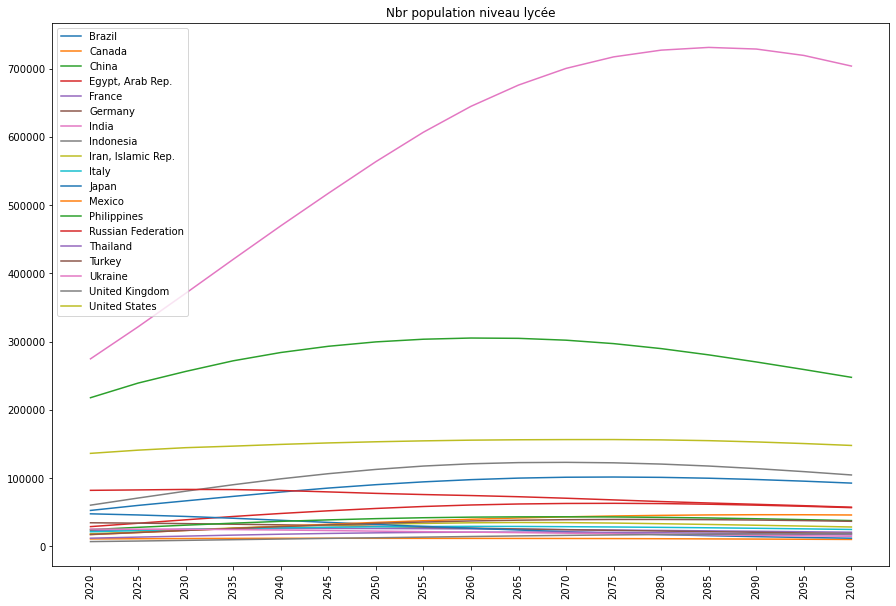

In [66]:
indicateurs = ['PRJ.POP.ALL.3.MF']
for i in indicateurs:
    figure = plt.figure(figsize=(15,10))
    plt.title('Nbr population niveau lycée')
    plt.xticks(rotation=90)
    for j in code_pays_retenus['Country Name'].dropna().unique():
        if len(df_codes_pays.loc[j,i].dropna())>0:
            plt.plot(df_codes_pays.loc[j,i].loc['2020':'2100'],label=j)
            # On peut calculer la tendance future pour chaque indicateur
            plt.legend()

### Top 20 des pays

In [67]:
df_Finale=df_Finale.iloc[0:20,[0,1,2,3,4,5]]
df_Finale

Country Name  Depense_education           PIB  \
0        United States        1454.512666  28503.381148   
1                China          30.219863   1638.667300   
2                India          19.845263    551.458910   
3   Russian Federation         224.628484   6177.017663   
4                Japan        1055.611852  25597.700099   
5               Brazil         205.266037   4278.142195   
6              Germany        1082.876086  23484.847331   
7            Indonesia          29.961878   1178.035708   
8              Ukraine         103.650046   1849.971983   
9   Iran, Islamic Rep.         117.713688   3001.096233   
10         Korea, Rep.         365.389881  10217.566017   
11         Philippines          29.341908   1083.637816   
12              France        1096.148587  22330.970067   
13              Mexico         205.349139   4819.412187   
14              Canada        1463.721085  23608.056614   
15      United Kingdom        1115.877112  22486.507037   
16               Italy         819.301534  19138.538910   
17              Turkey         118.266057   4355.052567   
18    Egypt, Arab Rep.          54.714970   1179.279165   
19            Thailand          78.324323   2220.667086   

    Nbr_population_connectee    Population  Nbr_Etudiants_lycee_univ  
0               1.232830e+08  2.621861e+08              7.664816e+07  
1               1.937854e+08  1.147783e+09              7.620931e+07  
2               5.270562e+07  9.297671e+08              3.653764e+07  
3               3.240281e+07  1.425872e+08              1.997956e+07  
4               5.586237e+07  1.218627e+08              1.929247e+07  
5               3.247319e+07  1.550717e+08              1.444563e+07  
6               3.689805e+07  8.020740e+07              1.218379e+07  
7               1.239056e+07  1.891965e+08              1.027179e+07  
8               6.477666e+06  4.891485e+07              8.947319e+06  
9               7.004892e+06  5.610354e+07              8.154300e+06  
10              2.143413e+07  4.334249e+07              8.008904e+06  
11              9.895761e+06  6.763163e+07              7.178268e+06  
12              2.292566e+07  5.936985e+07              6.643074e+06  
13              1.579942e+07  9.008119e+07              6.385929e+06  
14              1.452035e+07  2.866844e+07              6.305540e+06  
15              2.825872e+07  5.870883e+07              6.233524e+06  
16              1.625810e+07  5.712351e+07              6.192538e+06  
17              1.180436e+07  5.658446e+07              5.920738e+06  
18              7.797265e+06  6.185067e+07              5.895254e+06  
19              4.656851e+06  5.647509e+07              5.668054e+06

## Importation de la colonne "'PRJ.POP.ALL.3.MF'" dans la "df_Finale"

In [68]:
data_country_filtre = data_country_filtre.groupby(['Indicator Code','Country Name','Country Code']).mean()

In [69]:
total_population = pd.DataFrame(data_country_filtre.loc[['PRJ.POP.ALL.3.MF']].mean(axis=1).groupby(['Country Name']).mean(numeric_only=True))[0]
classement_population_future_niv_lycee = pd.DataFrame([total_population.index,total_population.values]).T
classement_population_future_niv_lycee = classement_population_future_niv_lycee.sort_values(by=[1],ascending=False)
classement_population_future_niv_lycee.columns = ['Country Name','Population_future_niv_lycee']
classement_population_future_niv_lycee= classement_population_future_niv_lycee.fillna(0)
classement_population_future_niv_lycee.head(50)

Country Name  Population_future_niv_lycee
72                India                542960.458947
31                China                268128.808421
182       United States                148678.995263
124             Nigeria                111246.031579
73            Indonesia                 99359.222632
127            Pakistan                 89619.186316
20               Brazil                 82881.945263
139  Russian Federation                 73952.183158
48     Egypt, Arab Rep.                 50230.392632
34     Congo, Dem. Rep.                 42670.200000
133         Philippines                 36299.984211
107              Mexico                 34138.370000
83                Kenya                 33253.053158
176              Turkey                 31132.617895
80                Japan                 30363.446842
74   Iran, Islamic Rep.                 28470.099474
60              Germany                 27806.568947
12           Bangladesh                 27580.403158
154        South Africa                 26364.484211
78                Italy                 26036.044737
53             Ethiopia                 25276.930000
55               France                 24027.082632
187             Vietnam                 22645.457368
118               Nepal                 21309.598421
179             Ukraine                 21251.499474
162               Sudan                 20558.356842
32             Colombia                 19000.880000
134              Poland                 17837.190000
170            Thailand                 17389.032105
5             Argentina                 16967.405263
2               Algeria                 16873.122105
101            Malaysia                 14763.221053
178              Uganda                 14560.158947
75                 Iraq                 14451.995263
100              Malawi                 13099.320000
181      United Kingdom                 13053.318421
156               Spain                 12831.676316
61                Ghana                 12629.172632
7             Australia                 12412.790000
169            Tanzania                 12033.662632
144        Saudi Arabia                 11990.577368
132                Peru                 11820.158947
27               Canada                 11286.075263
86          Korea, Rep.                 10940.212632
186       Venezuela, RB                  9489.465263
138             Romania                  9450.742105
82           Kazakhstan                  8484.031579
26             Cameroon                  8296.583684
30                Chile                  8023.214211
115             Myanmar                  7979.030000

In [70]:
classement_population_future_niv_lycee = classement_population_future_niv_lycee[['Population_future_niv_lycee','Country Name']]
df_Finale = pd.merge(df_Finale,classement_population_future_niv_lycee,how="right", on=["Country Name"])
df_Finale['Population_future_niv_lycee']=sorted(df_Finale['Population_future_niv_lycee'], reverse = True)
df_Finale

Country Name  Depense_education           PIB  \
0                       India          19.845263    551.458910   
1                       China          30.219863   1638.667300   
2               United States        1454.512666  28503.381148   
3                     Nigeria                NaN           NaN   
4                   Indonesia          29.961878   1178.035708   
..                        ...                ...           ...   
187       St. Kitts and Nevis                NaN           NaN   
188  St. Martin (French part)                NaN           NaN   
189                      Togo                NaN           NaN   
190                Uzbekistan                NaN           NaN   
191               Yemen, Rep.                NaN           NaN   

     Nbr_population_connectee    Population  Nbr_Etudiants_lycee_univ  \
0                5.270562e+07  9.297671e+08              3.653764e+07   
1                1.937854e+08  1.147783e+09              7.620931e+07   
2                1.232830e+08  2.621861e+08              7.664816e+07   
3                         NaN           NaN                       NaN   
4                1.239056e+07  1.891965e+08              1.027179e+07   
..                        ...           ...                       ...   
187                       NaN           NaN                       NaN   
188                       NaN           NaN                       NaN   
189                       NaN           NaN                       NaN   
190                       NaN           NaN                       NaN   
191                       NaN           NaN                       NaN   

     Population_future_niv_lycee  
0                  542960.458947  
1                  268128.808421  
2                  148678.995263  
3                  111246.031579  
4                   99359.222632  
..                           ...  
187                     0.000000  
188                     0.000000  
189                     0.000000  
190                     0.000000  
191                     0.000000  

[192 rows x 7 columns]

In [71]:
df_Finale.describe()

Depense_education           PIB  Nbr_population_connectee  \
count          20.000000     20.000000              2.000000e+01   
mean          483.536023  10385.000302              3.533171e+07   
std           528.449134  10304.699951              4.601027e+07   
min            19.845263    551.458910              4.656851e+06   
25%            72.421985   1797.145812              1.132721e+07   
50%           205.307588   4587.232377              1.884612e+07   
75%          1062.427910  22369.854309              3.357941e+07   
max          1463.721085  28503.381148              1.937854e+08   

         Population  Nbr_Etudiants_lycee_univ  Population_future_niv_lycee  
count  2.000000e+01              2.000000e+01                   192.000000  
mean   1.856758e+08              1.735509e+07                 13081.947859  
std    2.994682e+08              2.151359e+07                 46914.560048  
min    2.866844e+07              5.668054e+06                     0.000000  
25%    5.655712e+07              6.287536e+06                   250.509474  
50%    6.474115e+07              8.081602e+06                  2228.387632  
75%    1.457083e+08              1.565734e+07                  8091.556579  
max    1.147783e+09              7.664816e+07                542960.458947

# 3- Dans quels pays l'entreprise doit-elle opérer en priorité ?
## Application des poids à chaque indicateur pour le classement des pays

In [72]:
poids_Classement_web_access="0.35"
poids_etudiants="0.30"
poids_Classement_PIB="0.20"
poids_depenses_education= "0.10"
poids_evolution_population= "0.05"
Coef_affichage= "10**8"
df_Finale['Score']= (df_Finale['Depense_education']*float(poids_depenses_education))+(df_Finale['PIB']*float(poids_Classement_PIB))+(df_Finale['Nbr_population_connectee']*float(poids_Classement_web_access))+(df_Finale['Nbr_Etudiants_lycee_univ']*float(poids_etudiants))+(df_Finale['Population_future_niv_lycee']*float(poids_evolution_population))/5
df_Finale['Score']=df_Finale['Score']/10000000
df_Finale=df_Finale.sort_values(by=['Score'],ascending=False)
df_Finale.head(20)

Country Name  Depense_education           PIB  \
1                China          30.219863   1638.667300   
2        United States        1454.512666  28503.381148   
0                India          19.845263    551.458910   
14               Japan        1055.611852  25597.700099   
7   Russian Federation         224.628484   6177.017663   
16             Germany        1082.876086  23484.847331   
6               Brazil         205.266037   4278.142195   
35      United Kingdom        1115.877112  22486.507037   
21              France        1096.148587  22330.970067   
43         Korea, Rep.         365.389881  10217.566017   
19               Italy         819.301534  19138.538910   
11              Mexico         205.349139   4819.412187   
4            Indonesia          29.961878   1178.035708   
42              Canada        1463.721085  23608.056614   
13              Turkey         118.266057   4355.052567   
10         Philippines          29.341908   1083.637816   
24             Ukraine         103.650046   1849.971983   
15  Iran, Islamic Rep.         117.713688   3001.096233   
8     Egypt, Arab Rep.          54.714970   1179.279165   
28            Thailand          78.324323   2220.667086   

    Nbr_population_connectee    Population  Nbr_Etudiants_lycee_univ  \
1               1.937854e+08  1.147783e+09              7.620931e+07   
2               1.232830e+08  2.621861e+08              7.664816e+07   
0               5.270562e+07  9.297671e+08              3.653764e+07   
14              5.586237e+07  1.218627e+08              1.929247e+07   
7               3.240281e+07  1.425872e+08              1.997956e+07   
16              3.689805e+07  8.020740e+07              1.218379e+07   
6               3.247319e+07  1.550717e+08              1.444563e+07   
35              2.825872e+07  5.870883e+07              6.233524e+06   
21              2.292566e+07  5.936985e+07              6.643074e+06   
43              2.143413e+07  4.334249e+07              8.008904e+06   
19              1.625810e+07  5.712351e+07              6.192538e+06   
11              1.579942e+07  9.008119e+07              6.385929e+06   
4               1.239056e+07  1.891965e+08              1.027179e+07   
42              1.452035e+07  2.866844e+07              6.305540e+06   
13              1.180436e+07  5.658446e+07              5.920738e+06   
10              9.895761e+06  6.763163e+07              7.178268e+06   
24              6.477666e+06  4.891485e+07              8.947319e+06   
15              7.004892e+06  5.610354e+07              8.154300e+06   
8               7.797265e+06  6.185067e+07              5.895254e+06   
28              4.656851e+06  5.647509e+07              5.668054e+06   

    Population_future_niv_lycee     Score  
1                 268128.808421  9.070143  
2                 148678.995263  6.615677  
0                 542960.458947  2.943552  
14                 30363.446842  2.534631  
7                  73952.183158  1.733981  
16                 27806.568947  1.657565  
6                  82881.945263  1.570433  
35                 13053.318421  1.176587  
21                 24027.082632  1.002268  
43                 10940.212632  0.990724  
19                 26036.044737  0.755331  
11                 34138.370000  0.744827  
4                  99359.222632  0.742344  
42                 11286.075263  0.697922  
13                 31132.617895  0.591019  
10                 36299.984211  0.561903  
24                 21251.499474  0.495282  
15                 28470.099474  0.490004  
8                  50230.392632  0.450037  
28                 17389.032105  0.333164

In [73]:
mycolumns = ['Country Name','Score'] 
df_Finale=df_Finale[mycolumns].head(50)
df_Finale['Score']=sorted(df_Finale['Score'], reverse = True)
df_Finale.head(20)

Country Name     Score
1                China  9.070143
2        United States  6.615677
0                India  2.943552
14               Japan  2.534631
7   Russian Federation  1.733981
16             Germany  1.657565
6               Brazil  1.570433
35      United Kingdom  1.176587
21              France  1.002268
43         Korea, Rep.  0.990724
19               Italy  0.755331
11              Mexico  0.744827
4            Indonesia  0.742344
42              Canada  0.697922
13              Turkey  0.591019
10         Philippines  0.561903
24             Ukraine  0.495282
15  Iran, Islamic Rep.  0.490004
8     Egypt, Arab Rep.  0.450037
28            Thailand  0.333164

In [74]:
fig = px.bar(df_Finale, x='Country Name', y='Score',
             hover_data=['Country Name', 'Score'], color='Score',
             labels={'pop':'Scoring investments'}, height=800)
fig.show()